# Proyek Akhir: Menyelesaikan Permasalahan Attrition Karyawan
* Email: alfitoputra567@gmail.com
* Id Dicoding: alfitoptr

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, make_scorer

import joblib


# Setting style
sns.set_style("darkgrid")

### Menyiapkan data yang akan diguankan

In [2]:
df = pd.read_csv('employee_data.csv')
df.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2


Load data dan menampilkan 5 data pertama untuk melihat data seperti apa

## Data Understanding

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

Data terdiri dari 34 kolom dan 1470 baris berisikan tipe integer float dan object

In [4]:
for col in df.select_dtypes(include='object').columns:
    print(f"Unique values in column '{col}':")
    print(df[col].unique())
    print("\n")

Unique values in column 'BusinessTravel':
['Travel_Frequently' 'Travel_Rarely' 'Non-Travel']


Unique values in column 'Department':
['Human Resources' 'Research & Development' 'Sales']


Unique values in column 'EducationField':
['Other' 'Medical' 'Life Sciences' 'Marketing' 'Technical Degree'
 'Human Resources']


Unique values in column 'Gender':
['Male' 'Female']


Unique values in column 'JobRole':
['Human Resources' 'Healthcare Representative' 'Research Scientist'
 'Sales Executive' 'Manager' 'Laboratory Technician' 'Research Director'
 'Manufacturing Director' 'Sales Representative']


Unique values in column 'MaritalStatus':
['Married' 'Single' 'Divorced']


Unique values in column 'Over18':
['Y']


Unique values in column 'OverTime':
['Yes' 'No']




Code diatas mengidentifikasi isi kategori data tipe object. Hal penting yang perlu di lihat adalah:
* Terdapat 3 departemen yang ada dalam perusahaan ini, diantaranya Human Recources, Research & Development dan Sales. Terlihat dari masing masing departemen terdapat role manager, nama posisi tersebut harus diganti agar nantinya tidak mengganggu hasil analisis
* kolom Over18 hanya memiliki satu tipe yaitu 'Y' menandakan smeua karyawan berumur diatas 18 tahun, variabel ini hrus dihapus agar tidak mengganggu analisis

In [5]:
df.nunique().sort_values(ascending=True)

Over18                         1
StandardHours                  1
EmployeeCount                  1
Gender                         2
Attrition                      2
PerformanceRating              2
OverTime                       2
MaritalStatus                  3
Department                     3
BusinessTravel                 3
StockOptionLevel               4
EnvironmentSatisfaction        4
JobInvolvement                 4
JobSatisfaction                4
RelationshipSatisfaction       4
WorkLifeBalance                4
JobLevel                       5
Education                      5
EducationField                 6
TrainingTimesLastYear          7
JobRole                        9
NumCompaniesWorked            10
PercentSalaryHike             15
YearsSinceLastPromotion       16
YearsWithCurrManager          18
YearsInCurrentRole            19
DistanceFromHome              29
YearsAtCompany                37
TotalWorkingYears             40
Age                           43
HourlyRate

Code diatas menampilkan jumlah data unique dari masing masing kolom, terlihat kolom Over18	StandardHours	EmployeeCount hanya memiliki 1 unique data saja, variabel ini akan dihapus dalam proses analisisa

In [6]:
df.duplicated().sum()

0

Code diatas menampilkan jumlah data duplikasi. Tidak ada duplikasi dalam data

In [7]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
EmployeeId,1470.0,NaN,NaN,NaN,735.5,424.496761,1.0,368.25,735.5,1102.75,1470.0
Age,1470.0,NaN,NaN,NaN,36.92381,9.135373,18.0,30.0,36.0,43.0,60.0
Attrition,1058.0,NaN,NaN,NaN,0.169187,0.375094,0.0,0.0,0.0,0.0,1.0
BusinessTravel,1470,3,Travel_Rarely,1043,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DailyRate,1470.0,NaN,NaN,NaN,802.485714,403.5091,102.0,465.0,802.0,1157.0,1499.0
Department,1470,3,Research & Development,961,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DistanceFromHome,1470.0,NaN,NaN,NaN,9.192517,8.106864,1.0,2.0,7.0,14.0,29.0
Education,1470.0,NaN,NaN,NaN,2.912925,1.024165,1.0,2.0,3.0,4.0,5.0
EducationField,1470,6,Life Sciences,606,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeCount,1470.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0


Syntax diatas menampillkan statistik deksriptif data seperti count,	unique,	top,	freq,	mean,	std,	min,	25%,	50%,	75%, dan	max. Terlihat dari jumlah data kolom attrition memiliki nilai yang berbeda dari kolom lain yang menandakan terdapat missing value pada kolom tersebut.

In [8]:
missing_values = df.isna().sum()
missing_values[missing_values > 0]

Attrition    412
dtype: int64

Terdapat 412 karyawan yang tidak memiliki status attrition

In [9]:
missing_percentage = (missing_values['Attrition'] / len(df)) * 100
print(f"Missing percentage for Attrition: {missing_percentage:.2f}%")

Missing percentage for Attrition: 28.03%


Proporsi missing value pada kolom attrition adalah 28% dari total attrition

## Data Preparation / Preprocessing

### Data Cleaning

In [10]:
df = df.drop(columns=['Over18', 'StandardHours', 'EmployeeCount'])

menghapus kolom 'Over18', 'StandardHours', 'EmployeeCount'

In [11]:
df = df.dropna()

menghilangkan missing value

In [12]:
df.isna().sum().any()

False

In [13]:
df['JobRole'] = df.apply(
    lambda row: f"{row['Department']} Manager" if row['JobRole'] == 'Manager' else row['JobRole'],
    axis=1
)

jobrole_table = df.groupby('Department')['JobRole'].apply(lambda x: ', '.join(x.unique())).reset_index()

for index, row in jobrole_table.iterrows():
    print(f"Department: {row['Department']}")
    print(f"  JobRoles: {row['JobRole']}")
    print()

Department: Human Resources
  JobRoles: Human Resources, Human Resources Manager

Department: Research & Development
  JobRoles: Healthcare Representative, Research Scientist, Research & Development Manager, Laboratory Technician, Research Director, Manufacturing Director

Department: Sales
  JobRoles: Sales Executive, Sales Representative, Sales Manager



mengubah data role manager yang ada pada setiap departemen menjadi Manager + Departemen

### Feature Engineering and Selection

In [ ]:
df['overall_satisfaction'] = (
    df[['JobSatisfaction' , 'EnvironmentSatisfaction', 'RelationshipSatisfaction', 'WorkLifeBalance']].mean(axis=1)
)

Menambahkan variabel baru yaitu overall satisfaction yang merupakan rata rata dari seluruh satisfaction dan work life balance

In [ ]:
bins = [0, 25, 35, 45, 55, np.inf]
labels = ['Youth', 'Young Adult', 'Adult', 'Middle Age', 'Senior']

df['Age_Category'] = pd.cut(df['Age'], bins=bins, labels=labels)

Mengkategorikan umur menjadi beberapa kategori
* 'Youth': Umur 0 hingga 25 tahun.
* 'Young Adult': Umur 26 hingga 35 tahun.
* 'Adult': Umur 36 hingga 45 tahun.
* 'Middle Age': Umur 46 hingga 55 tahun.
* 'Senior': Umur 56 tahun ke atas.

In [ ]:
bins = [0, 1, 4, np.Inf]
labels = ['Recently Hired', '2-4 Years hired', 'More than 4 years']

df['YearsWithManagerCategory'] = pd.cut(df['YearsWithCurrManager'], bins=bins, labels=labels)

Mengkategorikan variabel YersWithManagerCategory menjadi 3 kategori
* Recently Hired (0 - 1 tahun)
* 2-4 Years Hired
* More than 4 Years

### Data Gathering

In [17]:
department_gender = df.groupby(['Department', 'Gender']).size().reset_index(name='GenderCount')

department_gender['GenderPercentage'] = (department_gender['GenderCount'] / department_gender.groupby('Department')['GenderCount'].transform('sum')) * 100

department_gender

,Department,Gender,GenderCount,GenderPercentage
0,Human Resources,Female,12,31.578947
1,Human Resources,Male,26,68.421053
2,Research & Development,Female,287,40.941512
3,Research & Development,Male,414,59.058488
4,Sales,Female,139,43.573668
5,Sales,Male,180,56.426332


Mendapatkan data jumlah dan presentase gender masing masing departemen

In [18]:
department_jobrole = df.groupby(['Department', 'JobRole']).agg(
    MeanMonthlyIncome=('MonthlyIncome', 'mean'),
    MeanTotalWorkingYears=('TotalWorkingYears', 'mean')
).reset_index()

department_jobrole

,Department,JobRole,MeanMonthlyIncome,MeanTotalWorkingYears
0,Human Resources,Human Resources,4573.300000,8.900000
1,Human Resources,Human Resources Manager,17905.500000,27.500000
2,Research & Development,Healthcare Representative,7769.727273,14.750000
3,Research & Development,Laboratory Technician,3240.632979,7.734043
4,Research & Development,Manufacturing Director,7438.000000,13.074766
5,Research & Development,Research & Development Manager,17269.666667,23.476190
6,Research & Development,Research Director,16115.774194,21.354839
7,Research & Development,Research Scientist,3152.677570,7.495327
8,Sales,Sales Executive,6917.797414,11.193966
9,Sales,Sales Manager,16739.896552,24.724138


Mendapatkan data departemen, rata rata income, dan rata rata bekerja dari masing masing job role

In [19]:
jobrole_attrition = df.groupby(['JobRole', 'Attrition']).agg(
    AttritionCount=('Attrition', 'size'),
    MeanEnvironmentSatisfaction=('EnvironmentSatisfaction', 'mean')
).reset_index()
jobrole_attrition['AttritionPercentage'] = (jobrole_attrition['AttritionCount'] / jobrole_attrition.groupby('JobRole')['AttritionCount'].transform('sum')) * 100
jobrole_attrition

,JobRole,Attrition,AttritionCount,MeanEnvironmentSatisfaction,AttritionPercentage
0,Healthcare Representative,0.0,80,2.887500,90.909091
1,Healthcare Representative,1.0,8,1.875000,9.090909
2,Human Resources,0.0,24,2.708333,80.000000
3,Human Resources,1.0,6,1.833333,20.000000
4,Human Resources Manager,0.0,8,3.000000,100.000000
5,Laboratory Technician,0.0,139,2.776978,73.936170
6,Laboratory Technician,1.0,49,2.265306,26.063830
7,Manufacturing Director,0.0,100,3.030000,93.457944
8,Manufacturing Director,1.0,7,2.285714,6.542056
9,Research & Development Manager,0.0,39,2.948718,92.857143


Mendapatkan data jumlah attrition, rata rata environment satisfaction dan presentase attrition masing masing job role

In [20]:
age_cat_attrition = df.groupby(['Age_Category', 'Attrition'], observed=True).agg(
    MeanNumCompaniesWorked=('NumCompaniesWorked', 'mean')).reset_index()
age_cat_attrition

,Age_Category,Attrition,MeanNumCompaniesWorked
0,Youth,0.0,1.315789
1,Youth,1.0,1.457143
2,Young Adult,0.0,1.959654
3,Young Adult,1.0,2.726190
4,Adult,0.0,3.092466
5,Adult,1.0,3.805556
6,Middle Age,0.0,3.666667
7,Middle Age,1.0,3.777778
8,Senior,0.0,4.060606
9,Senior,1.0,6.166667


Mendapatkan rata rata jumlah partner bekerja berdasarkan kategori umur dan attrition

In [21]:
overtime_attrition = df.groupby(['OverTime', 'Attrition']).agg(
    AttritionCount=('Attrition', 'size'),
    MeanMonthlyIncome=('MonthlyIncome', 'mean')
).reset_index()

overtime_attrition['AttritionPercentage'] = overtime_attrition.groupby('OverTime')['AttritionCount'].transform(lambda x: x / x.sum() * 100)

overtime_attrition

,OverTime,Attrition,AttritionCount,MeanMonthlyIncome,AttritionPercentage
0,No,0.0,670,6826.995522,89.214381
1,No,1.0,81,4998.222222,10.785619
2,Yes,0.0,209,7482.808612,68.078176
3,Yes,1.0,98,4769.387755,31.921824


Mendapatkan data rata rata income dan presentase attrition berdasarkan over time

In [22]:
department_attrition = df.groupby(['Department', 'Attrition']).agg(
    MeanMonthlyIncome=('MonthlyIncome', 'mean')).reset_index()
department_attrition

,Department,Attrition,MeanMonthlyIncome
0,Human Resources,0.0,7809.093750
1,Human Resources,1.0,5092.000000
2,Research & Development,0.0,6784.994949
3,Research & Development,1.0,4277.859813
4,Sales,0.0,7343.146245
5,Sales,1.0,5817.772727


mendapatkan data rata rata income bulanan perdepartemen dan attrition

In [23]:
jobsatisfaction_attrition = df.groupby(['JobSatisfaction', 'Attrition']).agg(
    MeanMonthlyIncome=('MonthlyIncome', 'mean')).reset_index()
jobsatisfaction_attrition

,JobSatisfaction,Attrition,MeanMonthlyIncome
0,1,0.0,7478.698113
1,1,1.0,4801.652174
2,2,0.0,7035.226994
3,2,1.0,5215.187500
4,3,0.0,7047.417969
5,3,1.0,4489.306452
6,4,0.0,6637.873754
7,4,1.0,5286.076923


Mendapatkan rata rata income bulanan berdasarkan job satisfaction dan attrition

In [ ]:
years_with_manager_attrition = df.groupby(['YearsWithManagerCategory', 'Attrition']).agg(
    MeanRelationshipSatisfaction=('RelationshipSatisfaction', 'mean')).reset_index()
years_with_manager_attrition

,YearsWithManagerCategory,Attrition,MeanRelationshipSatisfaction
0,Recently Hired,0.0,3.000000
1,Recently Hired,1.0,2.600000
2,2-4 Years hired,0.0,2.728070
3,2-4 Years hired,1.0,2.703125
4,More than 4 years,0.0,2.731638
5,More than 4 years,1.0,2.630435


mendapatkan rata rata relationship satisfaction berdasarkan kategori years with manager dan attrition

### Categorical Encoding

In [25]:
df.select_dtypes(include=['object', 'category']).columns

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime', 'Age_Category',
       'YearsWithManagerCategory'],
      dtype='object')

mengeluarkan kolom tipe object dan category

In [26]:
le = LabelEncoder()
string_columns = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime', 'Age_Category',
       'YearsWithManagerCategory', 'YearsWithManagerCategory']

label_mappings = {}

for column in string_columns:
    df[column] = le.fit_transform(df[column])
    label_mappings[column] = dict(enumerate(le.classes_))

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1058 entries, 1 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1058 non-null   int64  
 1   Age                       1058 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1058 non-null   int32  
 4   DailyRate                 1058 non-null   int64  
 5   Department                1058 non-null   int32  
 6   DistanceFromHome          1058 non-null   int64  
 7   Education                 1058 non-null   int64  
 8   EducationField            1058 non-null   int32  
 9   EnvironmentSatisfaction   1058 non-null   int64  
 10  Gender                    1058 non-null   int32  
 11  HourlyRate                1058 non-null   int64  
 12  JobInvolvement            1058 non-null   int64  
 13  JobLevel                  1058 non-null   int64  
 14  JobRole 

mengubah data tipe object dan catetgory menajadi integer

In [27]:
for column, mapping in label_mappings.items():
    print(f"\nMapping untuk kolom '{column}':")
    for key, value in mapping.items():
        print(f"  {key} -> {value}")


Mapping untuk kolom 'BusinessTravel':
  0 -> Non-Travel
  1 -> Travel_Frequently
  2 -> Travel_Rarely

Mapping untuk kolom 'Department':
  0 -> Human Resources
  1 -> Research & Development
  2 -> Sales

Mapping untuk kolom 'EducationField':
  0 -> Human Resources
  1 -> Life Sciences
  2 -> Marketing
  3 -> Medical
  4 -> Other
  5 -> Technical Degree

Mapping untuk kolom 'Gender':
  0 -> Female
  1 -> Male

Mapping untuk kolom 'JobRole':
  0 -> Healthcare Representative
  1 -> Human Resources
  2 -> Human Resources Manager
  3 -> Laboratory Technician
  4 -> Manufacturing Director
  5 -> Research & Development Manager
  6 -> Research Director
  7 -> Research Scientist
  8 -> Sales Executive
  9 -> Sales Manager
  10 -> Sales Representative

Mapping untuk kolom 'MaritalStatus':
  0 -> Divorced
  1 -> Married
  2 -> Single

Mapping untuk kolom 'OverTime':
  0 -> No
  1 -> Yes

Mapping untuk kolom 'Age_Category':
  0 -> Adult
  1 -> Middle Age
  2 -> Senior
  3 -> Young Adult
  4 -> Yo

memeperlihatkan perubahan kategori data menjadi tipe integer

### Split Data

In [28]:
X = df.drop(columns=['Attrition', 'EmployeeId'])
y = df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

membagi data menajdi training dan testing dengan 70% data training dan 30% data testing

In [29]:
X_train.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'overall_satisfaction', 'Age_Category',
       'YearsWithManagerCategory'],
      dtype='object')

In [30]:
X_train['StockOptionLevel'].head()

428    1
680    0
151    1
140    0
516    1
Name: StockOptionLevel, dtype: int64

### Feature Scaling

In [31]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

melakukan standarisasi data

## Oversampling SMOTE

In [32]:
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=42)

In [33]:
X_smt, y_smt = smt.fit_resample(X_train_scaled, y_train)

## EDA

### Eksplorasi Distribusi Data

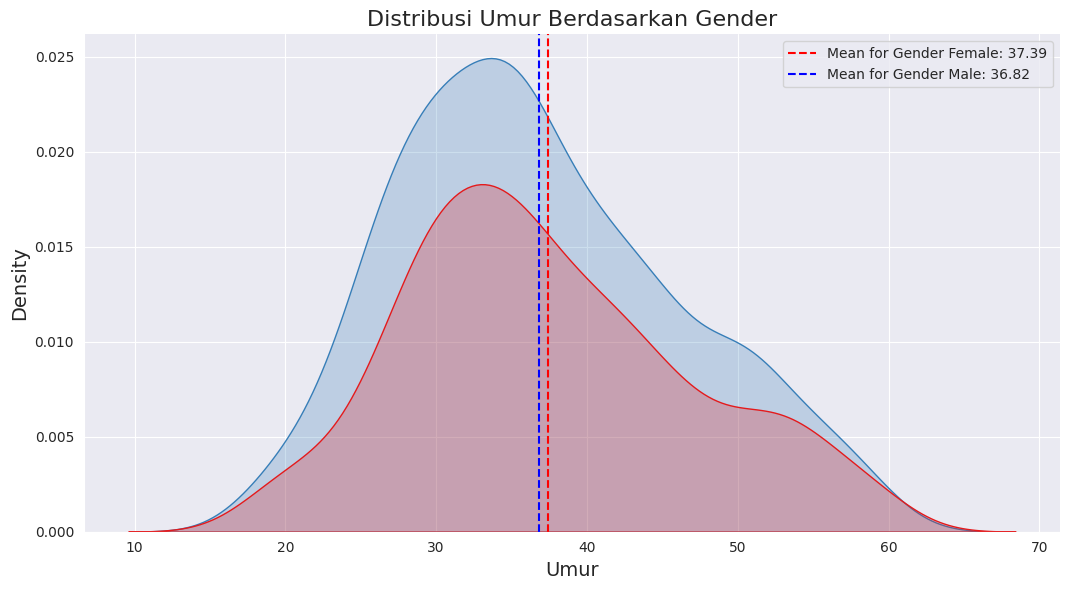

In [32]:
sns.displot(
    df, x="Age", hue="Gender", kind="kde",
    height=6, aspect=1.8, palette="Set1", fill=True, legend=False
)

genders = df["Gender"].unique()
for gender in genders:
    if gender == 1:
       mean_age = df[df["Gender"] == gender]["Age"].mean()
       plt.axvline(mean_age, color="blue", linestyle="--", label=f"Mean for Gender Male: {mean_age:.2f}")
    else:
       mean_age = df[df["Gender"] == gender]["Age"].mean()
       plt.axvline(mean_age, color="red", linestyle="--", label=f"Mean for Gender Female: {mean_age:.2f}")

plt.title('Distribusi Umur Berdasarkan Gender', fontsize=16)
plt.xlabel('Umur', fontsize=14)
plt.ylabel('Density', fontsize=14)


plt.legend(loc='upper right', fontsize=10, title_fontsize=12)

plt.tight_layout()

plt.show()

*   Distribusi karyawan laki-laki (male) tampak lebih tinggi dibandingkan dengan karyawan perempuan (female) pada sebagian besar rentang umur. Hal ini menunjukkan bahwa terdapat lebih banyak karyawan laki-laki dalam dataset dibandingkan dengan perempuan.
*   Rentang umur karyawan mayoritas berada di kisaran 25 hingga 40 tahun untuk kedua gender, dengan rata rata umur 37 tahun. Ini mengindikasikan bahwa mayoritas karyawan dalam dataset termasuk dalam kelompok usia produktif.

*   Puncak distribusi untuk kedua gender berada di sekitar umur 30 tahun, yang menunjukkan bahwa umur ini adalah yang paling umum atau paling banyak dalam dataset.

*   Persebaran umur karyawan laki-laki terlihat lebih lebar dibandingkan dengan perempuan, dengan laki-laki memiliki distribusi yang lebih signifikan di umur 40 tahun ke atas.

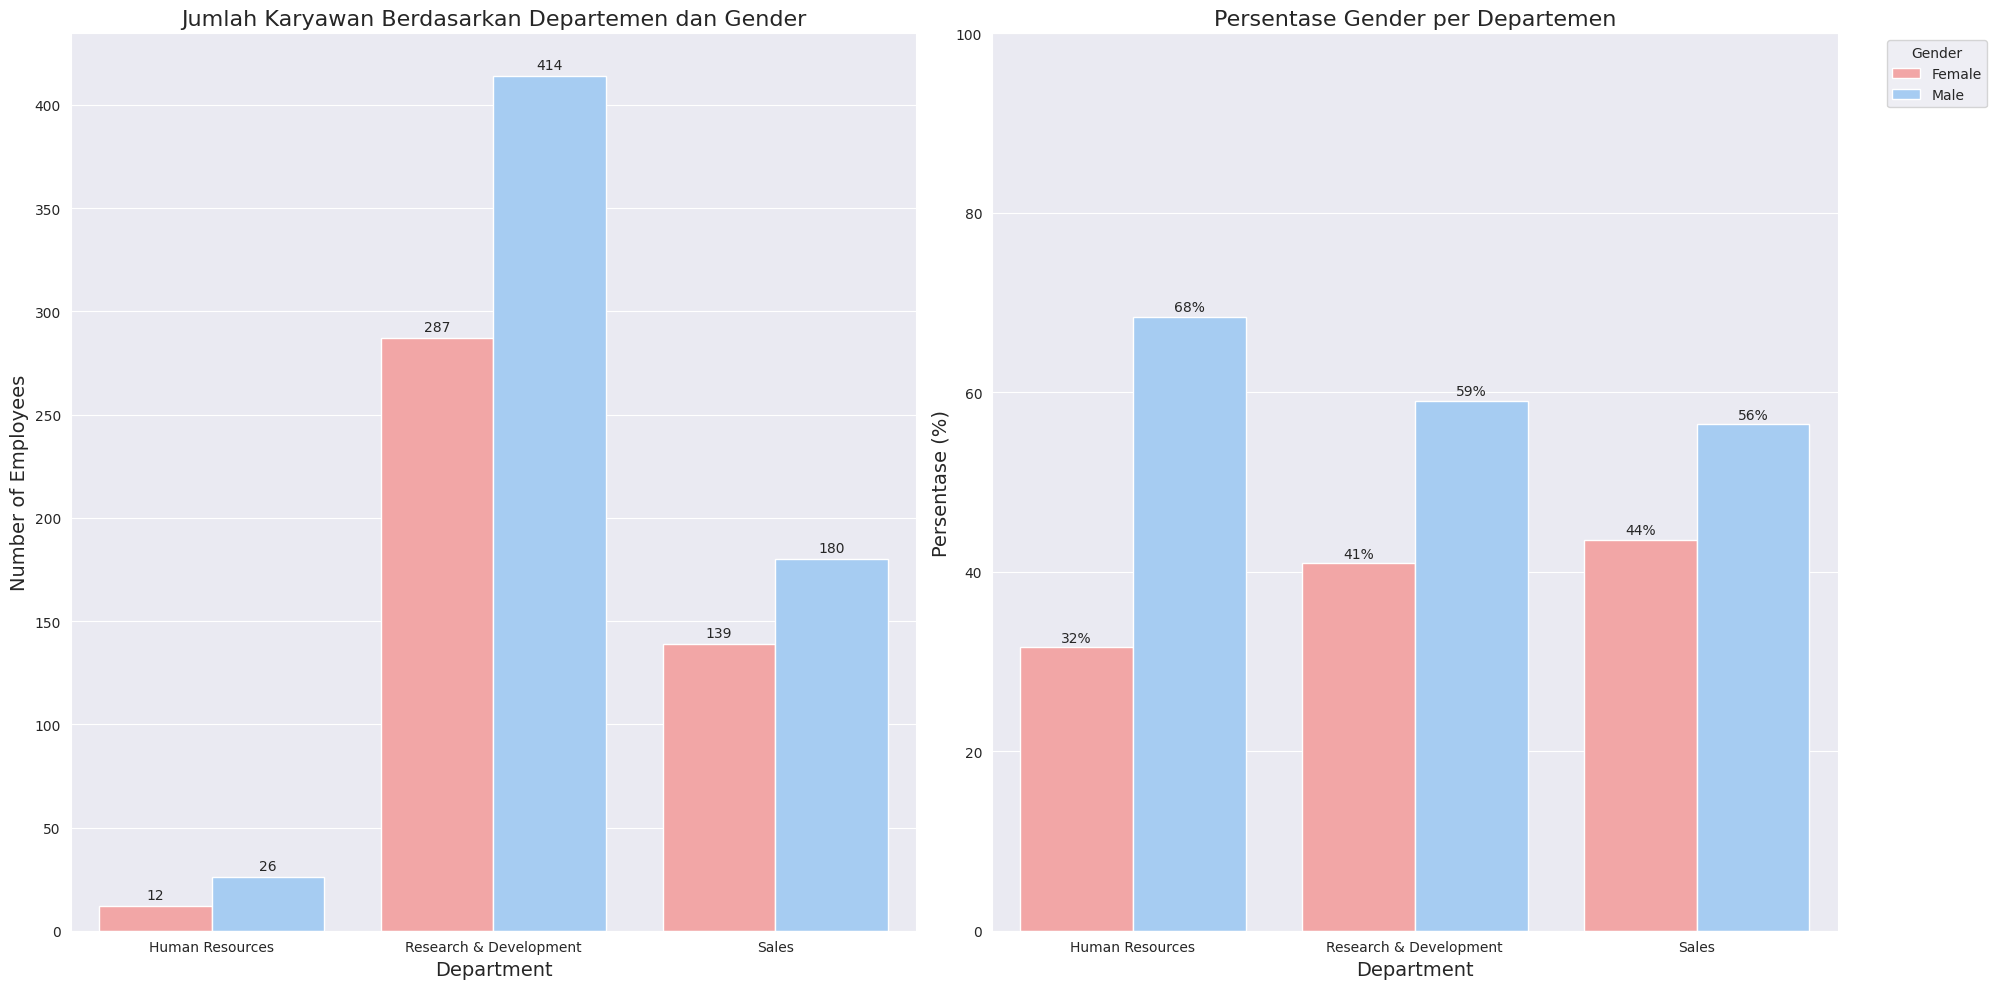

In [33]:
palette = {"Female": "#FF9999", "Male": "#99CCFF"}

fig, axes = plt.subplots(1, 2, figsize=(20, 10))
count = sns.barplot(x='Department', y='GenderCount',hue='Gender', data=department_gender, palette=palette, ax=axes[0], legend=False)
for container in count.containers:
    count.bar_label(container, fmt='%d', label_type='edge', fontsize=10, padding=3)
axes[0].set_title('Jumlah Karyawan Berdasarkan Departemen dan Gender', fontsize=16)
axes[0].set_xlabel('Department', fontsize=14)
axes[0].set_ylabel('Number of Employees', fontsize=14)

bar = sns.barplot(x='Department', y='GenderPercentage', hue='Gender', data=department_gender, palette=palette, ax=axes[1], legend=True)
axes[1].set_title('Persentase Gender per Departemen', fontsize=16)
axes[1].set_xlabel('Department', fontsize=14)
axes[1].set_ylabel('Persentase (%)', fontsize=14)
axes[1].set_ylim(0, 100)
for container in axes[1].containers:
    axes[1].bar_label(container, fmt='%.0f%%', label_type='edge', fontsize=10, padding=2)
axes[1].legend(title='Gender', loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=10)

plt.tight_layout()
plt.show()

* Secara keseluruhan, jumlah karyawan laki-laki lebih banyak dibandingkan perempuan di semua departemen.
* Departemen Research & Development memiliki jumlah karyawan terbanyak, diikuti oleh Sales, dan kemudian Human Resources.
* Perbedaan gender paling mencolok terlihat di departemen Research & Development.
* Meskipun jumlah absolut karyawan laki-laki lebih banyak di semua departemen, persentase gender di setiap departemen relatif mirip, dengan proporsi laki-laki sekitar 56-68% dan perempuan sekitar 31-43%. Ini menunjukkan bahwa meskipun jumlahnya berbeda, representasi gender di setiap departemen tidak terlalu timpang.




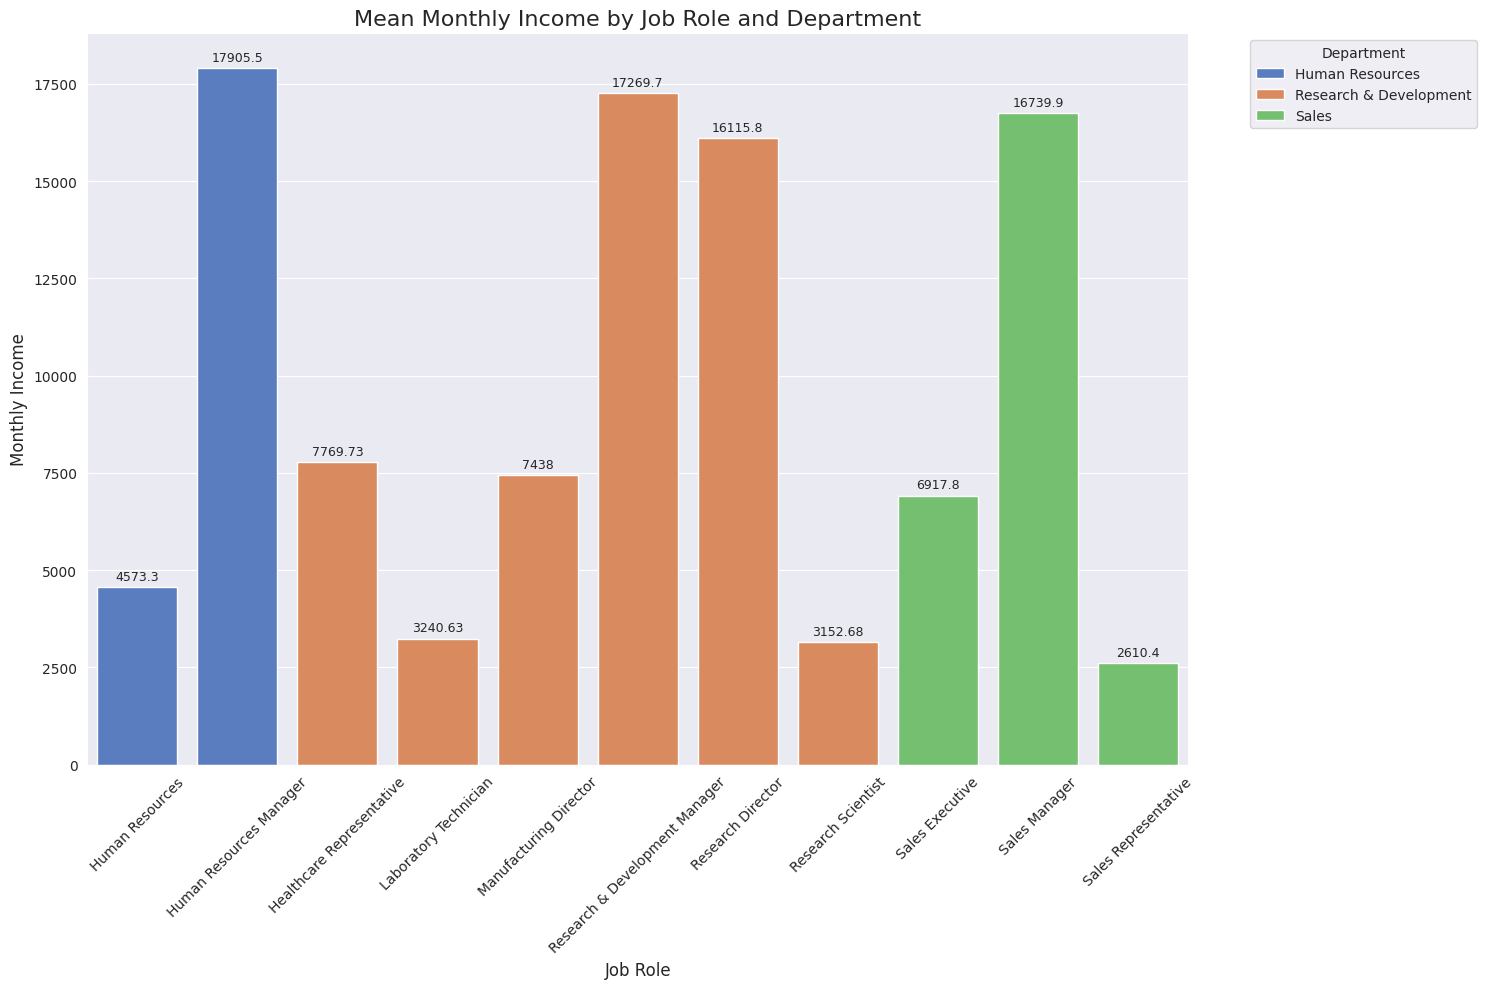

In [34]:
department_jobrole = department_jobrole.sort_values(by='Department')
plt.figure(figsize=(15, 10))
sns.barplot(
    data=department_jobrole,
    x='JobRole',
    y='MeanMonthlyIncome',
    hue='Department',
    palette='muted'
)

for container in plt.gca().containers:
    plt.gca().bar_label(container, fontsize=9, padding=3)

plt.title('Mean Monthly Income by Job Role and Department', fontsize=16)
plt.xlabel('Job Role', fontsize=12)
plt.ylabel('Monthly Income', fontsize=12)
plt.xticks(fontsize=10, rotation=45)

plt.legend(title='Department', loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=10)

plt.tight_layout()

plt.show()

* Terdapat hierarki pendapatan yang jelas berdasarkan peran pekerjaan, dengan peran manajerial umumnya memiliki pendapatan yang lebih tinggi.
* Perbedaan pendapatan antar departemen juga terlihat, terutama untuk peran non-manajerial. Misalnya, Research Scientist memiliki pendapatan yang lebih tinggi dibandingkan Healthcare Representative dan Laboratory Technician.
* Peran Sales Representative menonjol sebagai peran dengan rata-rata pendapatan terendah.

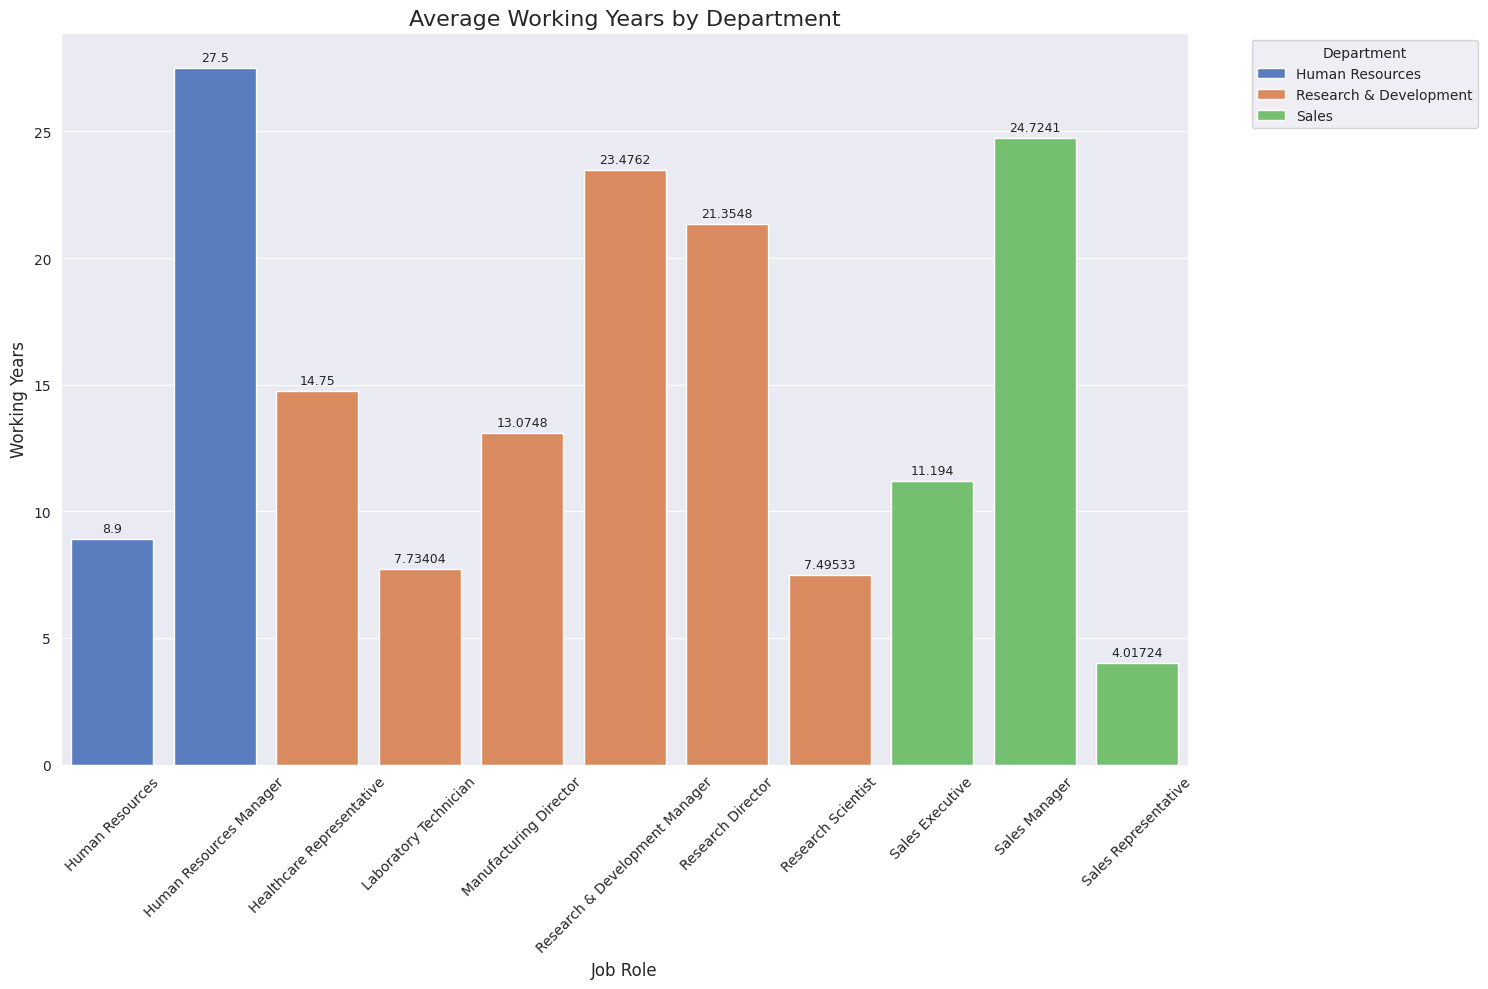

In [35]:
plt.figure(figsize=(15, 10))
sns.barplot(
    data=department_jobrole,
    x='JobRole',
    y='MeanTotalWorkingYears',
    hue='Department',
    palette='muted'
)

for container in plt.gca().containers:
    plt.gca().bar_label(container, fontsize=9, padding=3)

plt.title('Average Working Years by Department', fontsize=16)
plt.xlabel('Job Role', fontsize=12)
plt.ylabel('Working Years', fontsize=12)
plt.xticks(fontsize=10, rotation=45)

plt.legend(title='Department', loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=10)

plt.tight_layout()

plt.show()

* Peran manajerial umumnya diisi oleh karyawan dengan pengalaman kerja yang lebih lama dibandingkan peran non-manajerial.
* Terdapat variasi yang signifikan dalam rata-rata tahun bekerja antar departemen untuk peran yang sama.
* Peran Sales Representative menonjol sebagai peran dengan rata-rata tahun bekerja terendah, yang dapat mengimplikasikan tingkat retensi yang lebih rendah atau titik awal karir.

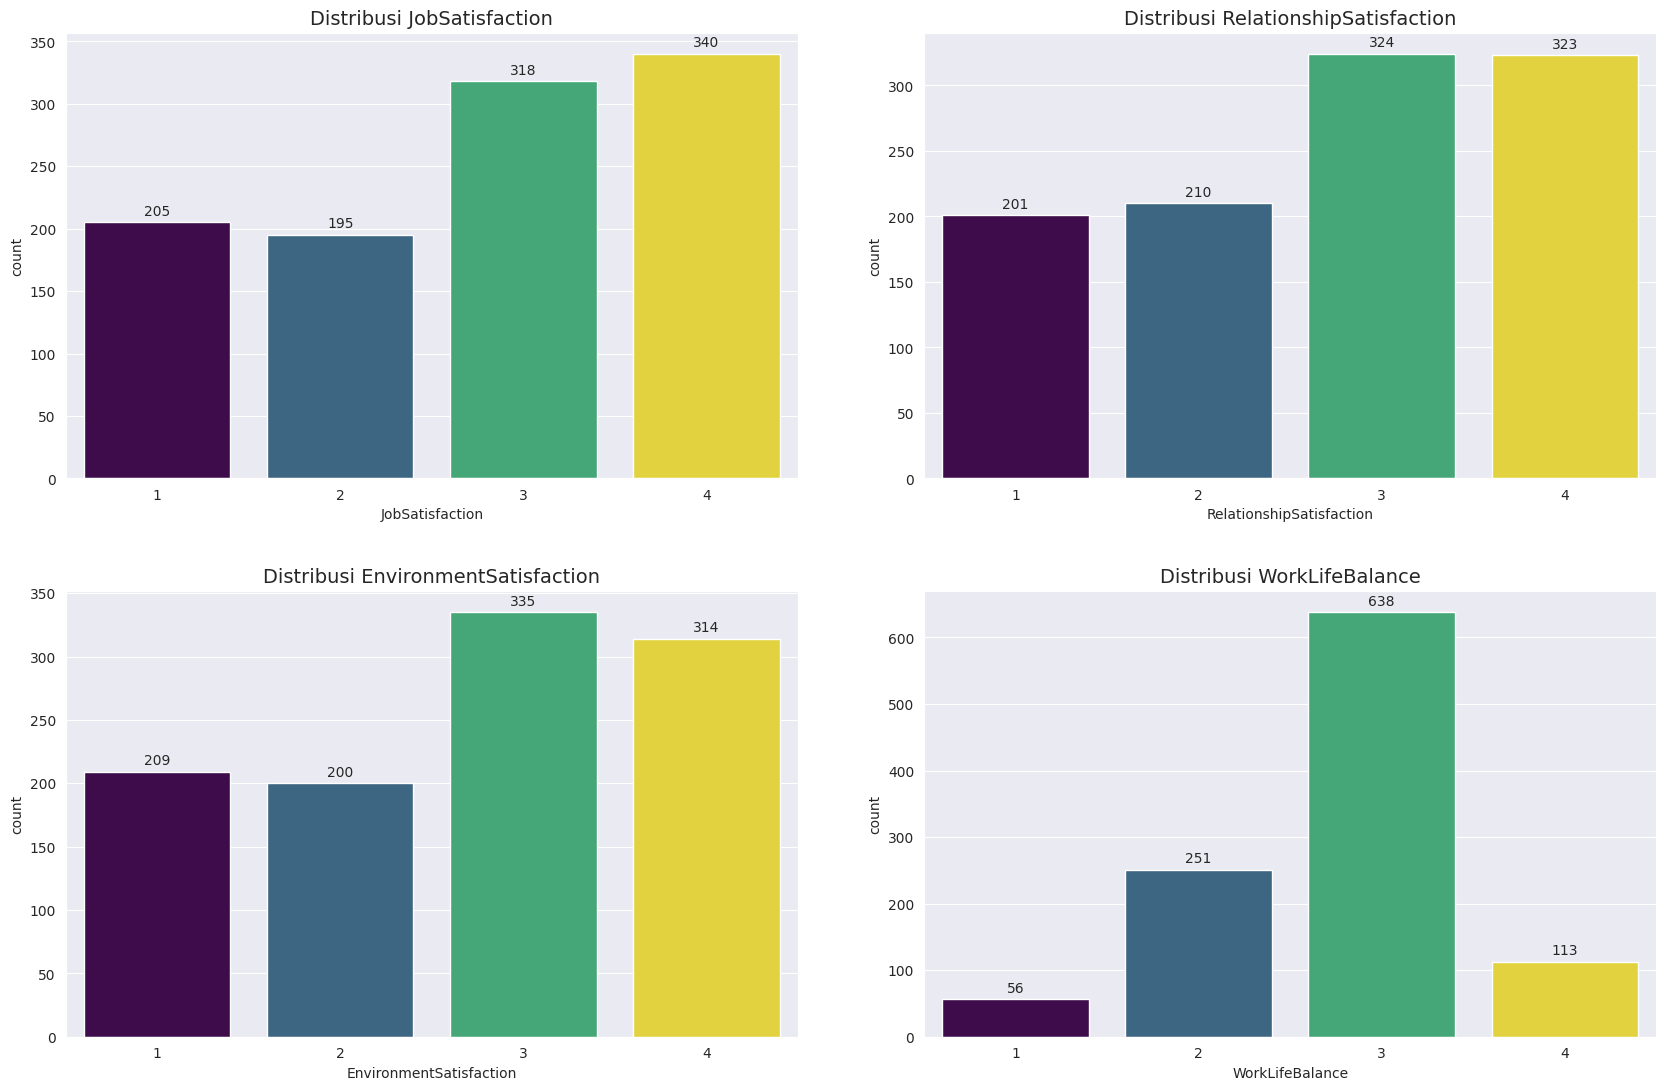

In [36]:
df = df.sort_values(by='JobSatisfaction', ascending=True)

fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.tight_layout(pad=6.0)

sns.countplot(ax=axes[0, 0], x='JobSatisfaction', data=df, palette='viridis', hue='JobSatisfaction', legend=False)
for container in axes[0, 0].containers:
    axes[0, 0].bar_label(container, fmt='%d', label_type='edge', fontsize=10, padding=3)
axes[0, 0].set_title("Distribusi JobSatisfaction", fontsize=14)


sns.countplot(ax=axes[0, 1], x='RelationshipSatisfaction', data=df, palette='viridis', hue='RelationshipSatisfaction', legend=False)
for container in axes[0, 1].containers:
    axes[0, 1].bar_label(container, fmt='%d', label_type='edge', fontsize=10, padding=3)
axes[0, 1].set_title("Distribusi RelationshipSatisfaction", fontsize=14)


sns.countplot(ax=axes[1, 0], x='EnvironmentSatisfaction', data=df, palette='viridis', hue='EnvironmentSatisfaction', legend=False)
for container in axes[1, 0].containers:
    axes[1, 0].bar_label(container, fmt='%d', label_type='edge', fontsize=10, padding=3)
axes[1, 0].set_title("Distribusi EnvironmentSatisfaction", fontsize=14)


sns.countplot(ax=axes[1, 1], x='WorkLifeBalance', data=df, palette='viridis', hue='WorkLifeBalance', legend=False)
for container in axes[1, 1].containers:
    axes[1, 1].bar_label(container, fmt='%d', label_type='edge', fontsize=10, padding=3)
axes[1, 1].set_title("Distribusi WorkLifeBalance", fontsize=14)

plt.show()


**Kesimpulan Umum dari Keempat Plot:**

Untuk JobSatisfaction, RelationshipSatisfaction, dan EnvironmentSatisfaction, distribusinya relatif serupa, dengan sebagian besar karyawan berada pada tingkat 3 dan 4 (cukup puas dan sangat puas). Ini menunjukkan bahwa secara umum, karyawan merasa puas dengan pekerjaan, hubungan, dan lingkungan kerja mereka.
Distribusi WorkLifeBalance berbeda secara signifikan. Sebagian besar karyawan berada pada tingkat 3, tetapi hanya sedikit yang berada pada tingkat 4. Ini menunjukkan bahwa meskipun sebagian besar karyawan merasa memiliki keseimbangan kerja-hidup yang cukup baik, hanya sedikit yang merasa sangat baik. Ini bisa menjadi area yang perlu ditingkatkan oleh perusahaan.

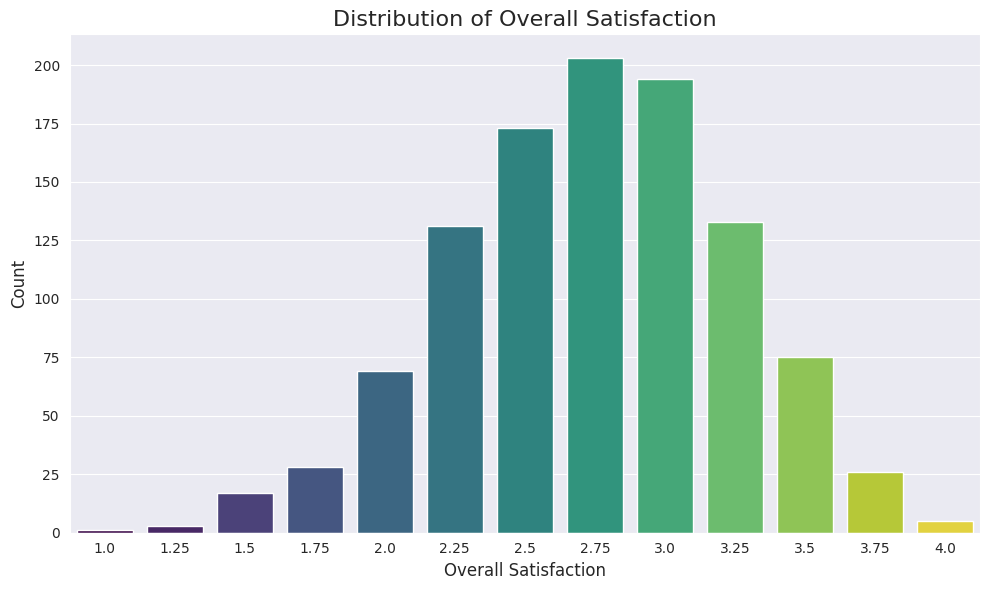

In [37]:
df = df.sort_values(by='overall_satisfaction')

plt.figure(figsize=(10, 6))
sns.countplot(
    data=df,
    x='overall_satisfaction',
    palette='viridis',
    hue = 'overall_satisfaction',
    legend=False
)

plt.title('Distribution of Overall Satisfaction', fontsize=16)
plt.xlabel('Overall Satisfaction', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.tight_layout()
plt.show()

Sebagian besar karyawan berada di tengah skala kepuasan, penting untuk dicatat bahwa puncaknya berada di sekitar 2.75 dan 3.0, bukan di 3.5 atau 4.0. Ini menunjukkan bahwa meskipun sebagian besar karyawan tidak tidak puas, hanya sedikit yang benar-benar sangat puas. Ini bisa menjadi area yang perlu diperhatikan oleh perusahaan.

### Analisis Attrition Berdasarkan Demografi, Jabatan, dan Generasi

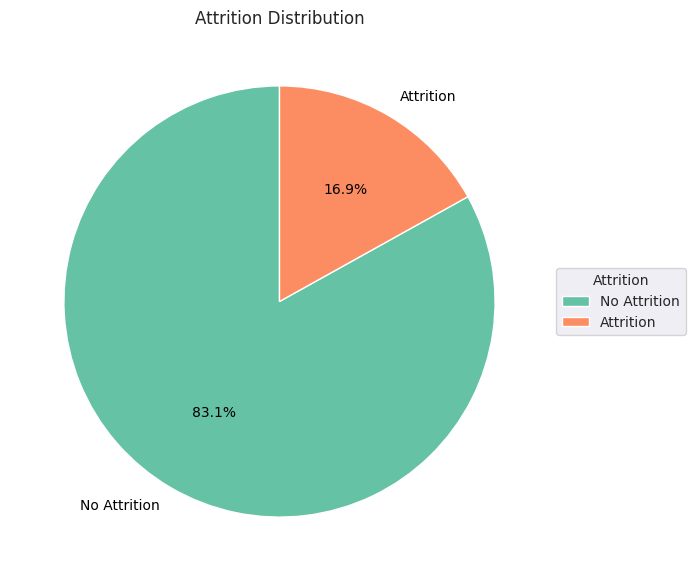

In [38]:
fig, ax = plt.subplots(figsize=(10, 7))
wedges, texts, autotexts = ax.pie(
    df['Attrition'].value_counts(),
    labels=['No Attrition', 'Attrition'],
    startangle=90,
    autopct='%1.1f%%',
    colors=['#66c2a5', '#fc8d62'],
    textprops=dict(color="black")
)

ax.legend(
    wedges,
    ['No Attrition', 'Attrition'],
    title="Attrition",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)

ax.set_title("Attrition Distribution")

plt.show()

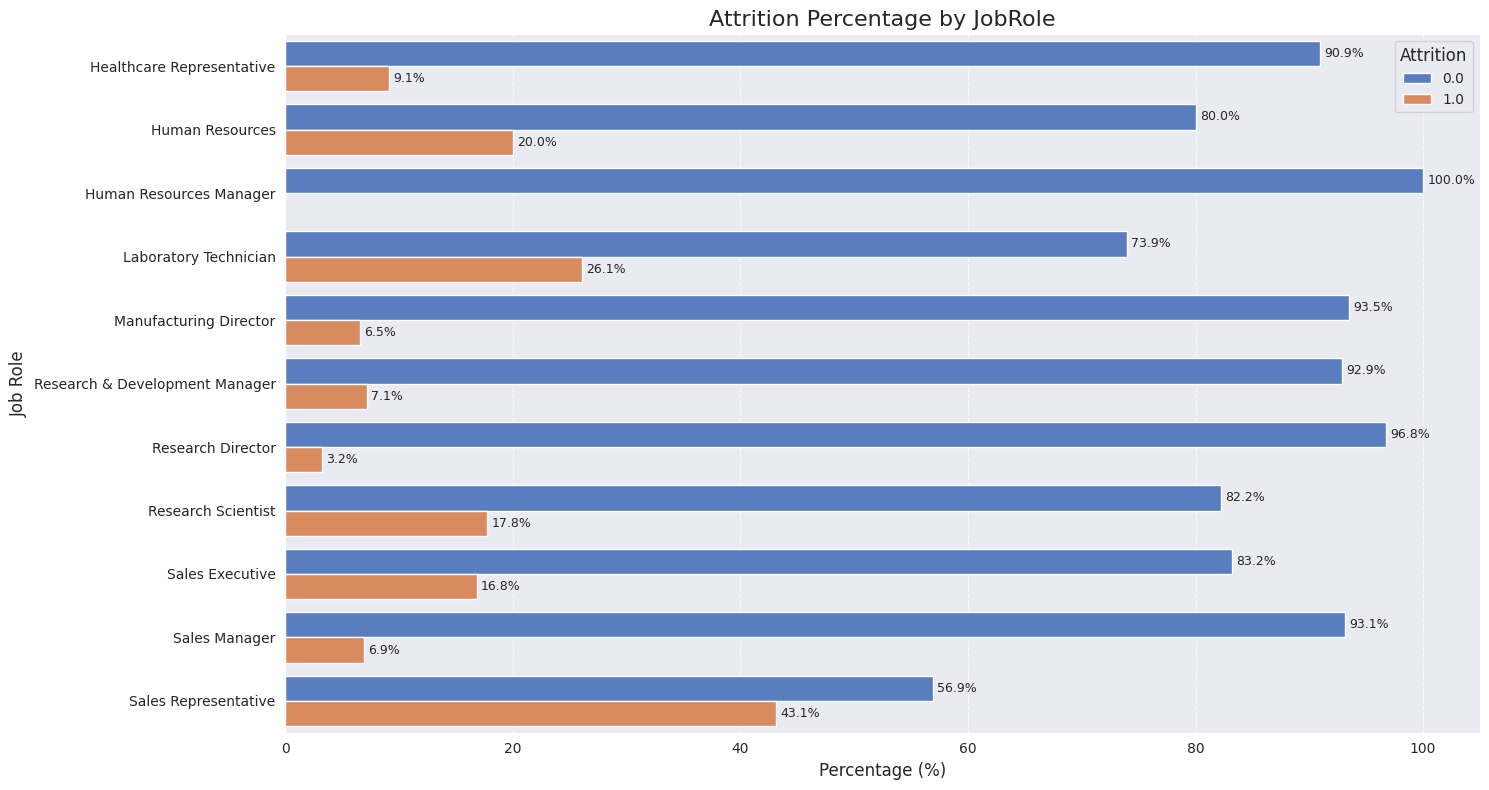

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 8))
sns.barplot(
    data=jobrole_attrition,
    y='JobRole',
    x='AttritionPercentage',
    hue='Attrition',
    palette='muted'
)

plt.title('Attrition Percentage by JobRole', fontsize=16)
plt.xlabel('Percentage (%)', fontsize=12)
plt.ylabel('Job Role', fontsize=12)
ax.legend(title='Attrition', fontsize=10, title_fontsize=12, loc='upper right')
ax.grid(axis='x', linestyle='--', alpha=0.7)

for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%.1f%%', fontsize=9, padding=3)
ax.legend(title='Attrition',loc='upper right', fontsize=10, title_fontsize=12)
plt.tight_layout()
plt.show()


* Tingkat attrition sangat bervariasi antar peran pekerjaan.
* Peran-peran manajerial (Manager, Manufacturing Director, Research Director) memiliki tingkat attrition terendah, menunjukkan stabilitas yang tinggi di level ini.
* Peran Sales Representative memiliki tingkat attrition tertinggi, menunjukkan masalah retensi yang signifikan di peran ini.
* Peran-peran lainnya (Healthcare Representative, Human Resources, Laboratory Technician, Research Scientist, Sales Executive) memiliki tingkat attrition di antara kedua ekstrem tersebut.

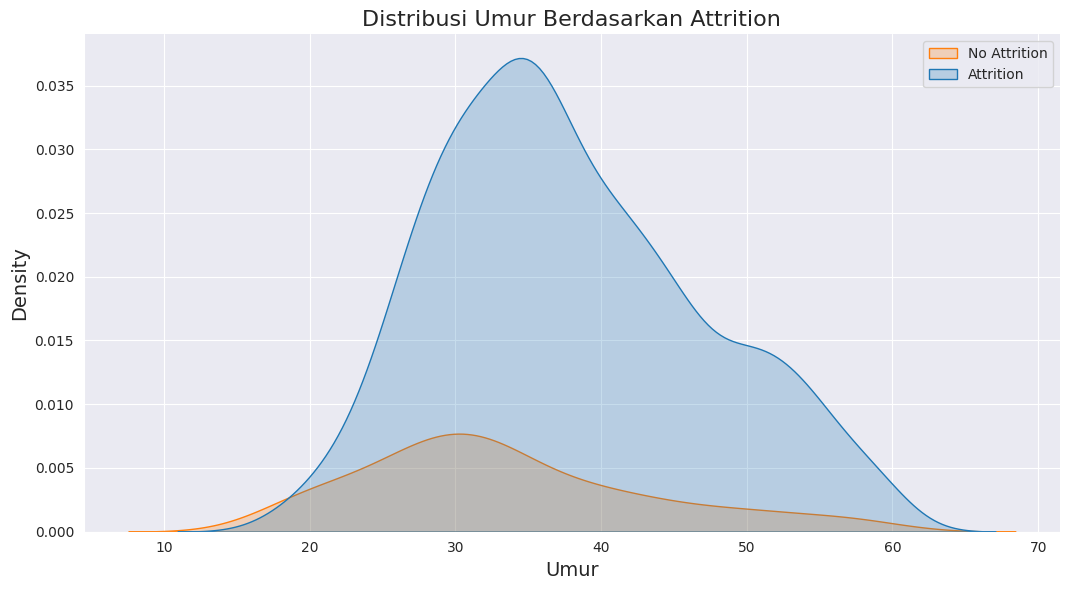

In [40]:
sns.displot(
    df, x="Age", hue="Attrition", kind="kde",
    height=6, aspect=1.8, fill=True, color={1.0: 'red', 0.0: 'blue'}, legend=False
)


plt.title('Distribusi Umur Berdasarkan Attrition', fontsize=16)
plt.xlabel('Umur', fontsize=14)
plt.ylabel('Density', fontsize=14)

plt.legend(labels={'No Attrition': 0, 'Attrition': 1}, loc='upper right', fontsize=10, title_fontsize=12)

plt.tight_layout()

plt.show()


* Karyawan yang keluar dari perusahaan cenderung lebih muda dibandingkan karyawan yang tetap bekerja.
* Terdapat variasi umur yang lebih besar di antara karyawan yang keluar dibandingkan dengan karyawan yang tetap.
* Data ini mengindikasikan bahwa umur mungkin merupakan faktor yang berkontribusi pada keputusan karyawan untuk keluar dari perusahaan. Karyawan yang lebih muda cenderung lebih mungkin untuk mencari peluang di tempat lain.

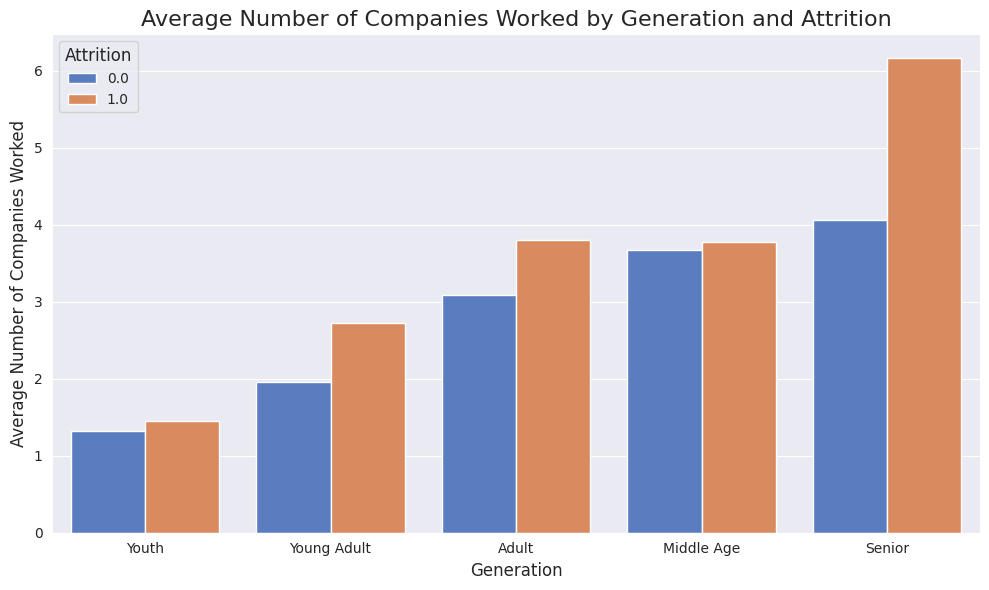

In [41]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=age_cat_attrition,
    x='Age_Category',
    y='MeanNumCompaniesWorked',
    hue='Attrition',
    palette='muted', legend=True
)

plt.title('Average Number of Companies Worked by Generation and Attrition', fontsize=16)
plt.xlabel('Generation', fontsize=12)
plt.ylabel('Average Number of Companies Worked', fontsize=12)
plt.xticks(fontsize=10)
plt.legend(title='Attrition',loc='upper left', fontsize=10, title_fontsize=12)
plt.tight_layout()

plt.show()

* Terdapat tren peningkatan rata-rata jumlah perusahaan tempat bekerja seiring bertambahnya generasi (dari Youth ke Senior). Ini wajar karena semakin tua seseorang, semakin banyak pengalaman kerja yang mungkin dimiliki, termasuk berpindah-pindah perusahaan.
* Di setiap generasi, karyawan yang keluar dari perusahaan (attrition 1.0) memiliki rata-rata jumlah perusahaan tempat bekerja yang lebih tinggi dibandingkan karyawan yang tetap bekerja (attrition 0.0). Perbedaan ini semakin mencolok pada generasi yang lebih tua.
* Data ini mengindikasikan bahwa karyawan yang sering berpindah-pindah pekerjaan di masa lalu (seperti yang ditunjukkan oleh jumlah perusahaan tempat bekerja yang lebih tinggi) lebih mungkin untuk keluar dari perusahaan saat ini.

###  Analisis Attrition Berdasarkan Kerja Lembur

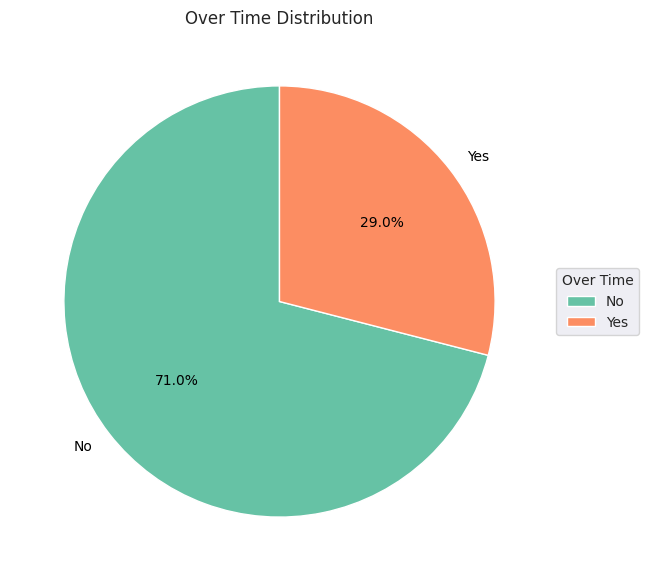

In [42]:
fig, ax = plt.subplots(figsize=(10, 7))
wedges, texts, autotexts = ax.pie(
    df['OverTime'].value_counts(),
    labels=['No', 'Yes'],
    startangle=90,
    autopct='%1.1f%%',
    colors=['#66c2a5', '#fc8d62'],
    textprops=dict(color="black")
)


ax.legend(
    wedges,
    ['No', 'Yes'],
    title="Over Time",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)

ax.set_title("Over Time Distribution")

plt.show()

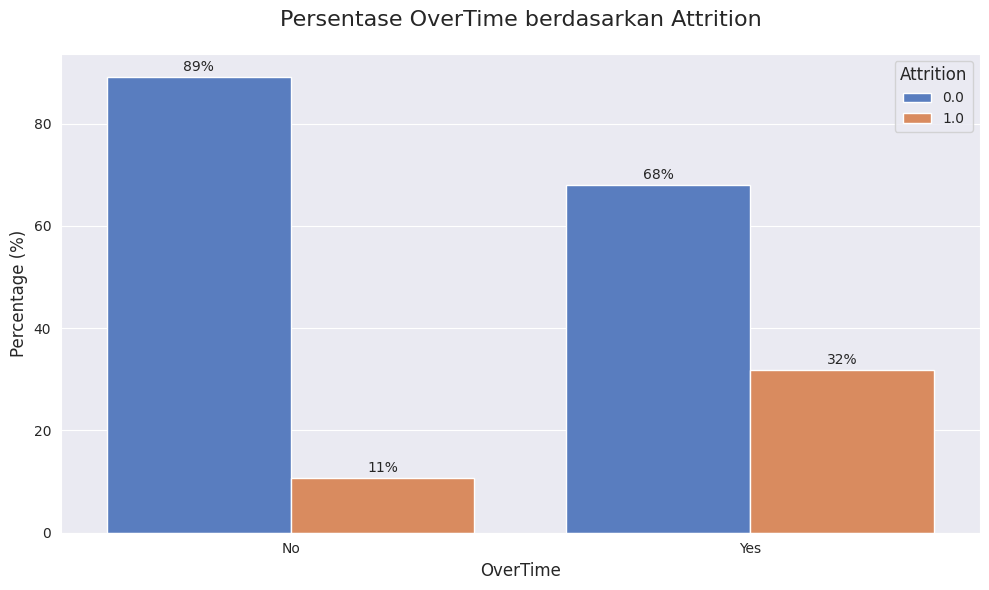

In [43]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=overtime_attrition, x="OverTime", y="AttritionPercentage", hue="Attrition", palette="muted")

ax.set_title("Persentase OverTime berdasarkan Attrition", fontsize=16, pad=20)
ax.set_xlabel("OverTime", fontsize=12)
ax.set_ylabel("Percentage (%)", fontsize=12)

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f%%', label_type='edge', fontsize=10, padding=2)

plt.legend(title="Attrition", fontsize=10, title_fontsize=12)

plt.tight_layout()
plt.show()


Proporsi yang karyawan yang keluar memiliki 31.9% bekerja overtime, sedangkan pada karyawan tetap hanya 10.8% saja yang bekerja overtime. Berdasarkan data ini, OverTime tampaknya menjadi salah satu faktor penyebab Attrition


### Analisis Attration Berdasarkan Pendapatan

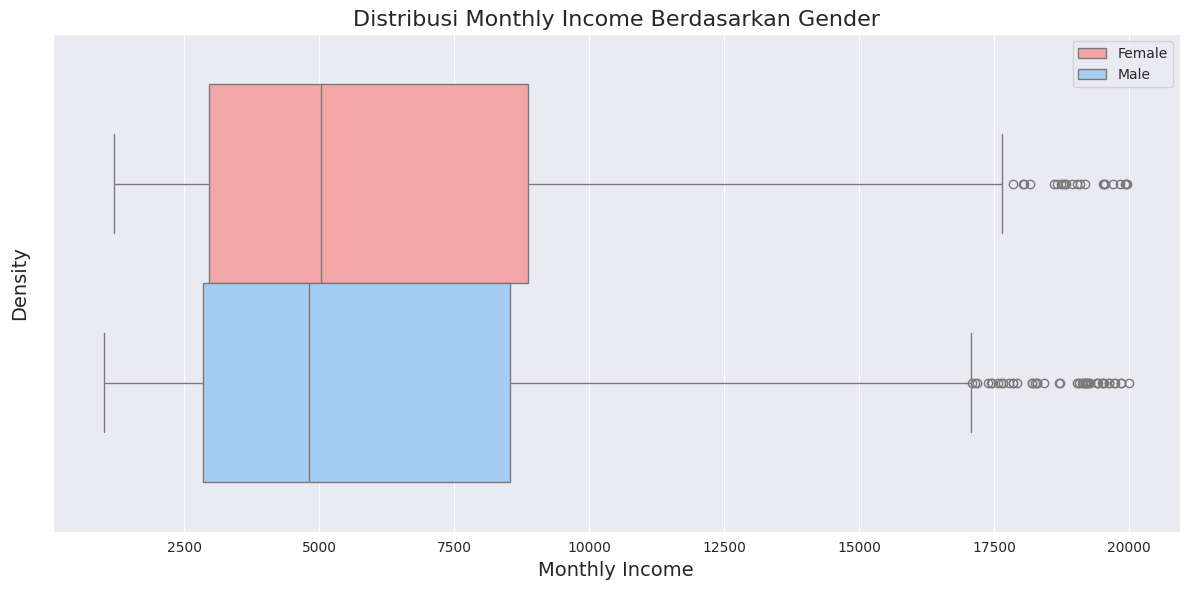

In [44]:
palette = {0: "#FF9999", 1: "#99CCFF"}
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="MonthlyIncome", hue="Gender", palette=palette)

plt.title('Distribusi Monthly Income Berdasarkan Gender', fontsize=16)
plt.xlabel('Monthly Income', fontsize=14)
plt.ylabel('Density', fontsize=14, labelpad=10)

plt.legend(labels=['Female', 'Male'])

plt.tight_layout()
plt.show()

* Tidak terlihat adanya perbedaan besar antara penghasilan karyawan laki-laki dan perempuan dalam distribusi ini. Hal ini mungkin menunjukkan adanya tingkat kesetaraan penghasilan yang baik di perusahaan ini.
* Terdapat banyak outliers di kedua kelompok gender, terutama di sisi penghasilan yang lebih tinggi. Ini menandakan adanya sejumlah kecil karyawan dengan penghasilan jauh di atas normal.

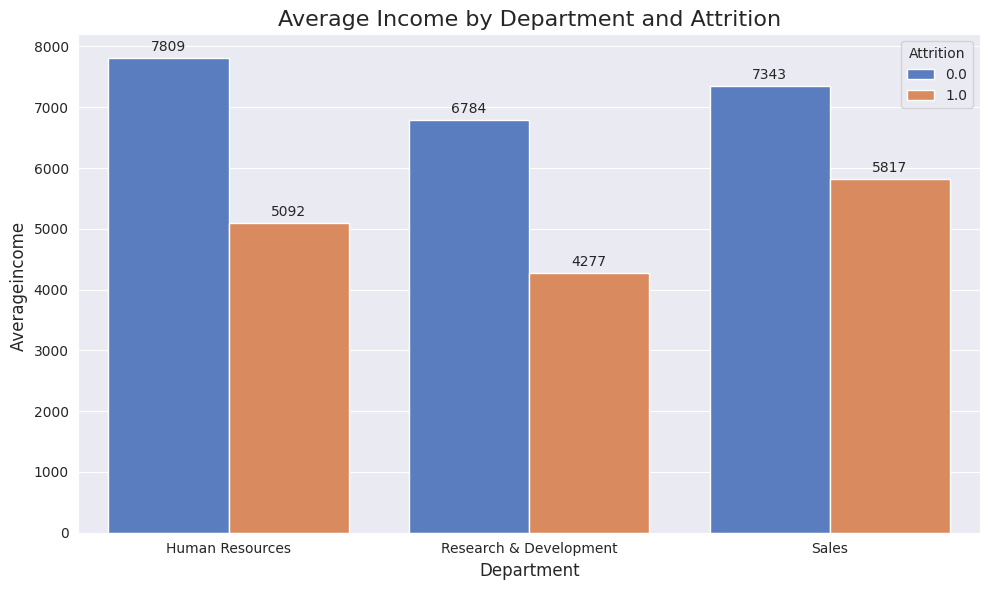

In [45]:
plt.figure(figsize=(10, 6))
bar = sns.barplot(
    data=department_attrition,
    x='Department',
    y='MeanMonthlyIncome',
    hue='Attrition',
    palette='muted'
)

for container in bar.containers:
    bar.bar_label(container, fmt='%d', label_type='edge', fontsize=10, padding=3)

plt.title('Average Income by Department and Attrition', fontsize=16)
plt.xlabel('Department', fontsize=12)
plt.ylabel('Averageincome ', fontsize=12)
plt.xticks(fontsize=10)
plt.legend(title='Attrition', fontsize=10)
plt.tight_layout()

plt.show()

* Di semua departemen, karyawan yang keluar dari perusahaan (attrition 1.0) memiliki rata-rata pendapatan yang lebih rendah dibandingkan karyawan yang tetap bekerja (attrition 0.0).
* Perbedaan rata-rata pendapatan antara karyawan yang keluar dan yang tetap bekerja paling besar di departemen Research & Development, diikuti oleh Human Resources, dan kemudian Sales.
* Data ini mengindikasikan bahwa pendapatan mungkin menjadi salah satu faktor yang berkontribusi pada keputusan karyawan untuk keluar dari perusahaan. Karyawan dengan pendapatan yang lebih rendah cenderung lebih mungkin untuk mencari pekerjaan di tempat lain.

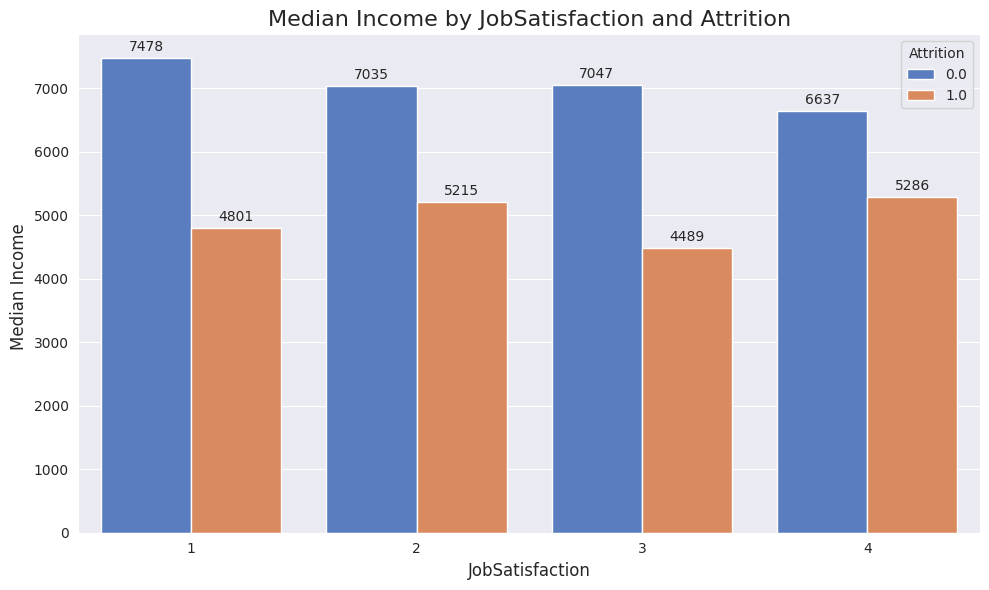

In [46]:
plt.figure(figsize=(10, 6))
bar = sns.barplot(
    data=jobsatisfaction_attrition,
    x='JobSatisfaction',
    y='MeanMonthlyIncome',
    hue='Attrition',
    palette='muted'
)

for container in bar.containers:
    bar.bar_label(container, fmt='%d', label_type='edge', fontsize=10, padding=3)

plt.title('Median Income by JobSatisfaction and Attrition', fontsize=16)
plt.xlabel('JobSatisfaction', fontsize=12)
plt.ylabel('Median Income ', fontsize=12)
plt.xticks(fontsize=10)
plt.legend(title='Attrition', fontsize=10)
plt.tight_layout()

plt.show()

* Perbedaan pendapatan median antara karyawan yang keluar dan yang tetap bekerja cukup konsisten di semua tingkat kepuasan kerja.
* Data ini sangat kuat mengindikasikan bahwa pendapatan merupakan faktor penting dalam keputusan karyawan untuk keluar dari perusahaan, terlepas dari tingkat kepuasan kerja mereka. Bahkan karyawan yang sangat tidak puas tetapi memiliki pendapatan yang lebih tinggi cenderung tetap bekerja.

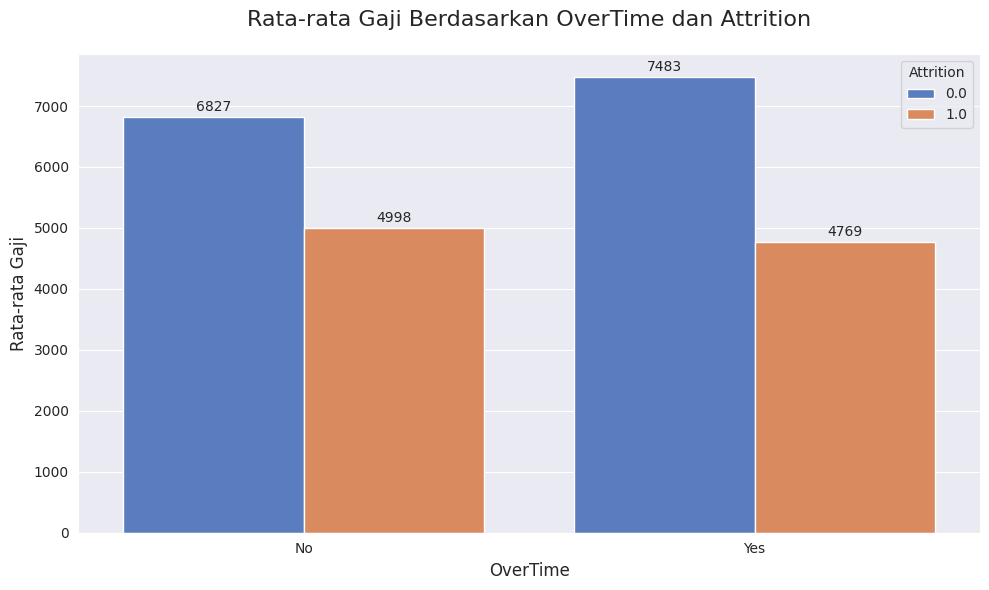

In [47]:
plt.figure(figsize=(10, 6))
sns.barplot(data=overtime_attrition, x='OverTime', y='MeanMonthlyIncome', hue='Attrition', palette='muted')

plt.title("Rata-rata Gaji Berdasarkan OverTime dan Attrition", fontsize=16, pad=20)
plt.xlabel("OverTime", fontsize=12)
plt.ylabel("Rata-rata Gaji", fontsize=12)

ax = plt.gca()
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', fontsize=10, padding=2)

plt.tight_layout()
plt.show()


Data ini mengindikasikan bahwa gaji mungkin merupakan faktor penting dalam keputusan karyawan untuk keluar dari perusahaan, dan efek ini diperkuat oleh lembur. Karyawan dengan gaji yang lebih rendah cenderung lebih mungkin untuk keluar, dan kecenderungan ini lebih kuat di antara mereka yang juga lembur. Lembur mungkin memperburuk perasaan negatif terkait gaji rendah, atau mungkin juga ada faktor lain yang terkait dengan lembur yang memengaruhi keputusan untuk keluar (misalnya, stres, kurangnya keseimbangan kerja-hidup).

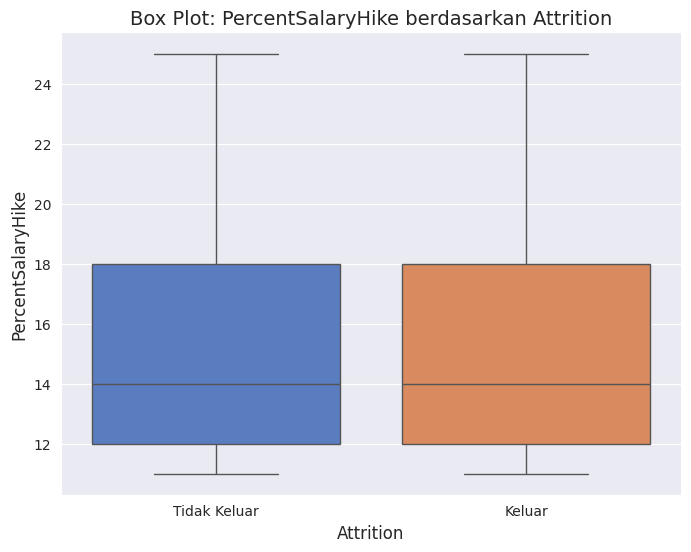

In [48]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Attrition', y='PercentSalaryHike', palette='muted', hue='Attrition', data=df, legend=False) # inner untuk menampilkan kuartil
plt.title('Box Plot: PercentSalaryHike berdasarkan Attrition', fontsize=14)
plt.xlabel('Attrition', fontsize=12)
plt.ylabel('PercentSalaryHike', fontsize=12)
plt.xticks([0, 1], ['Tidak Keluar', 'Keluar'])
sns.despine()
plt.show()

Berdasarkan box plot ini, dapat disimpulkan bahwa tidak ada perbedaan yang signifikan dalam distribusi PercentSalaryHike antara karyawan yang keluar dan yang tetap bekerja. Ini mengindikasikan bahwa persentase kenaikan gaji bukan merupakan faktor yang membedakan karyawan yang keluar dari perusahaan.

### Analisis Attration Berdasarkan Tingkat Kepuasan Bekerja

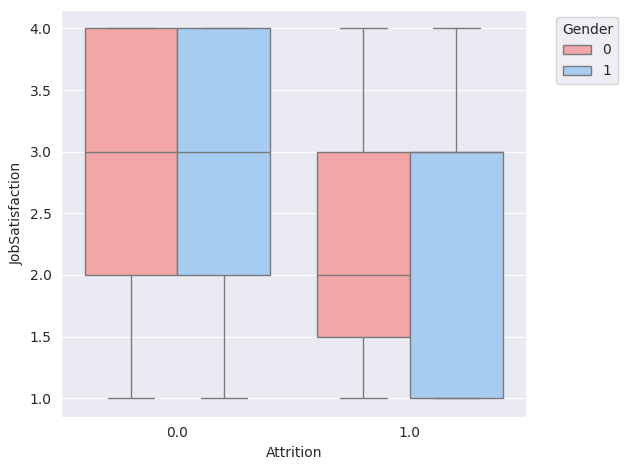

In [49]:
palette = {0: "#FF9999", 1: "#99CCFF"}
sns.boxplot(data=df, x="Attrition", y="JobSatisfaction", hue="Gender", palette=palette)

plt.legend(title='Gender', loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=10)
plt.tight_layout()
plt.show()

* Karyawan yang keluar dari perusahaan cenderung memiliki tingkat kepuasan kerja yang lebih rendah dibandingkan karyawan yang tetap bekerja, baik laki-laki maupun perempuan. Ini terlihat dari median yang lebih rendah pada kelompok Attrition 1.
* Variasi tingkat kepuasan kerja pada karyawan yang keluar lebih besar dibandingkan pada karyawan yang tetap bekerja. Ini menunjukkan bahwa ada spektrum yang lebih luas dari tingkat ketidakpuasan di antara mereka yang keluar.
* Tidak ada perbedaan yang signifikan dalam tingkat kepuasan kerja antara laki-laki dan perempuan yang keluar atau tetap bekerja, dilihat dari median yang relatif sama dan overlap antar kotak. Namun, terlihat ada beberapa karyawan laki-laki yang tingkat kepuasannya sangat rendah (mencapai nilai 1) sebelum keluar.

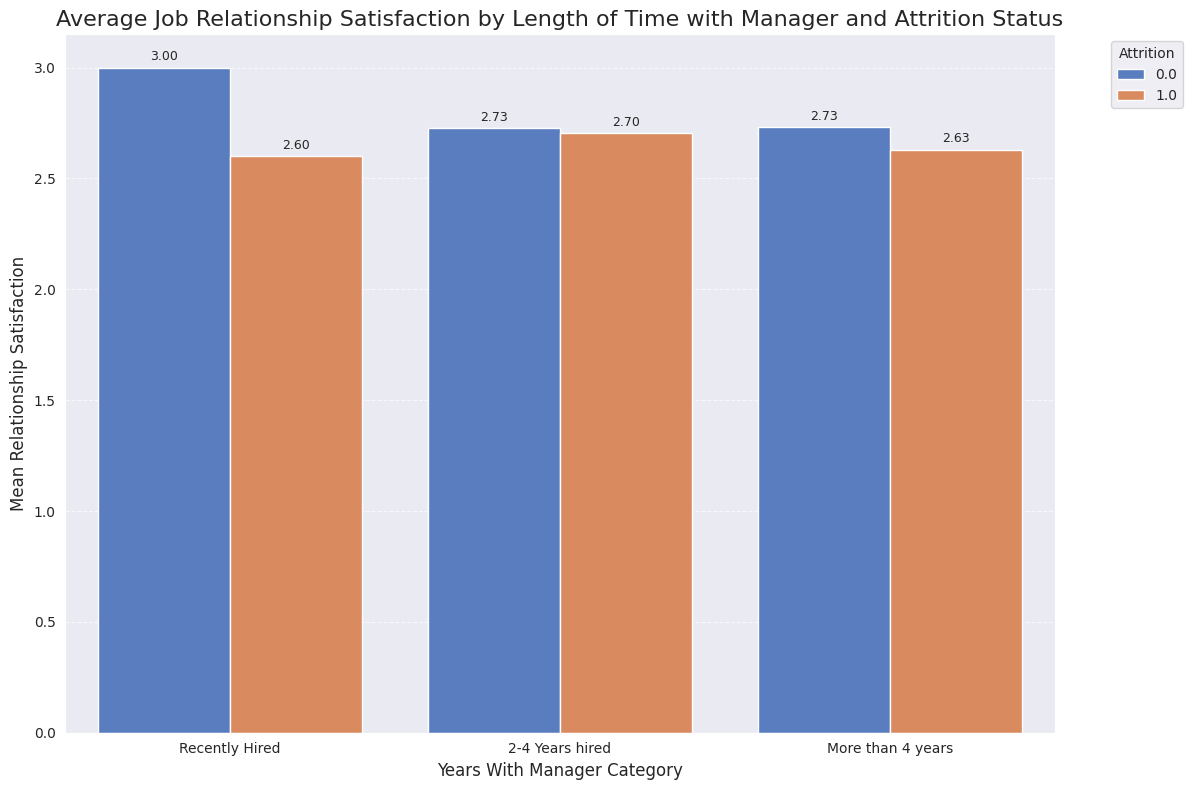

In [50]:
plt.figure(figsize=(12, 8))
sns.barplot(
    data=years_with_manager_attrition,
    x='YearsWithManagerCategory',
    y='MeanRelationshipSatisfaction',
    hue='Attrition',
    palette='muted'
)

plt.title('Average Job Relationship Satisfaction by Length of Time with Manager and Attrition Status', fontsize=16)
plt.xlabel('Years With Manager Category', fontsize=12)
plt.ylabel('Mean Relationship Satisfaction', fontsize=12)
plt.legend(title='Attrition', fontsize=10, title_fontsize=12, loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%.2f', fontsize=9, padding=3)
plt.legend(title='Attrition', loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=10)
plt.tight_layout()
plt.show()


* Kepuasan hubungan dengan manajer tampaknya paling tinggi di antara karyawan yang baru direkrut dan tetap bekerja di perusahaan.
* Perbedaan kepuasan hubungan antara karyawan yang keluar dan yang tetap paling besar terlihat pada kelompok yang baru direkrut. Karyawan yang baru direkrut dan kemudian keluar menunjukkan tingkat kepuasan hubungan yang lebih rendah dibandingkan mereka yang tetap.
* Untuk karyawan yang telah bekerja 2-4 tahun atau dengan manajer yang sudah lama menjabat, status attrition tampaknya tidak terlalu berpengaruh pada kepuasan hubungan dengan manajer.

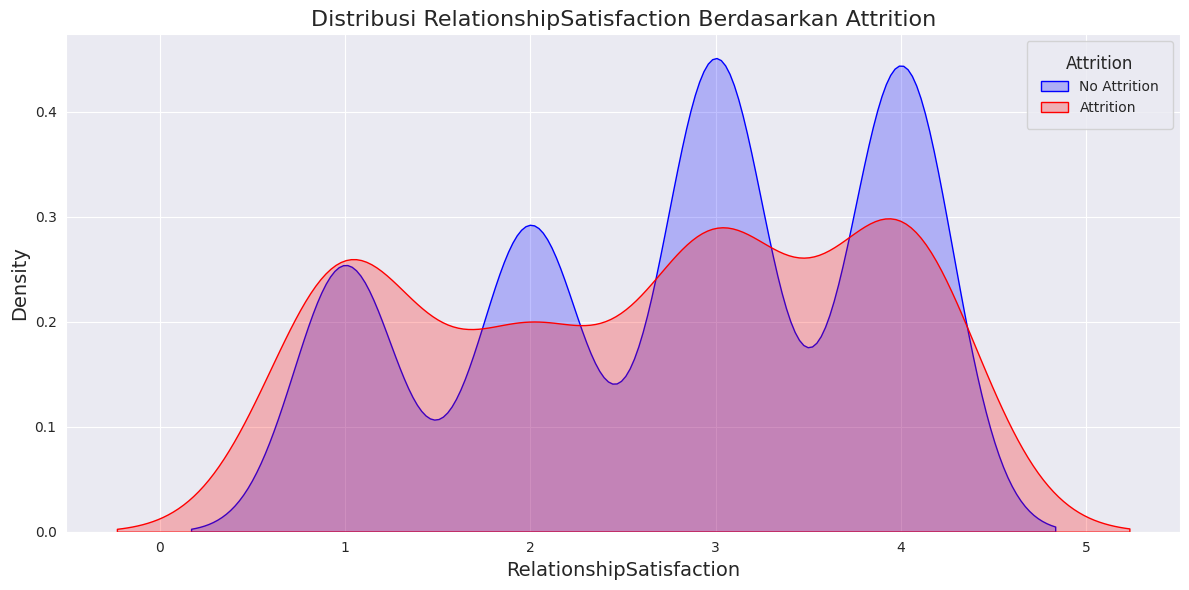

In [51]:
plt.figure(figsize=(12, 6))

sns.kdeplot(
    data=df[df['Attrition'] == 0], x="RelationshipSatisfaction",
    fill=True, color='blue', label='No Attrition', linewidth=1
)
sns.kdeplot(
    data=df[df['Attrition'] == 1], x="RelationshipSatisfaction",
    fill=True, color='red', label='Attrition', linewidth=1
)

plt.title('Distribusi RelationshipSatisfaction Berdasarkan Attrition', fontsize=16)
plt.xlabel('RelationshipSatisfaction', fontsize=14)
plt.ylabel('Density', fontsize=14)

plt.legend(
    title='Attrition',
    loc='upper right',
    fontsize=10,
    title_fontsize=12,
    frameon=True,
    framealpha=0.8,
    borderpad=1
)

plt.tight_layout()

plt.show()


Berdasarkan plot ini, dapat disimpulkan bahwa kepuasan hubungan, jika dilihat secara terpisah, tampaknya bukan merupakan faktor utama yang mendorong karyawan untuk keluar dari perusahaan. Meskipun ada sedikit kecenderungan karyawan yang keluar memiliki kepuasan hubungan yang lebih rendah, perbedaannya tidak cukup besar untuk dianggap sebagai penyebab utama.

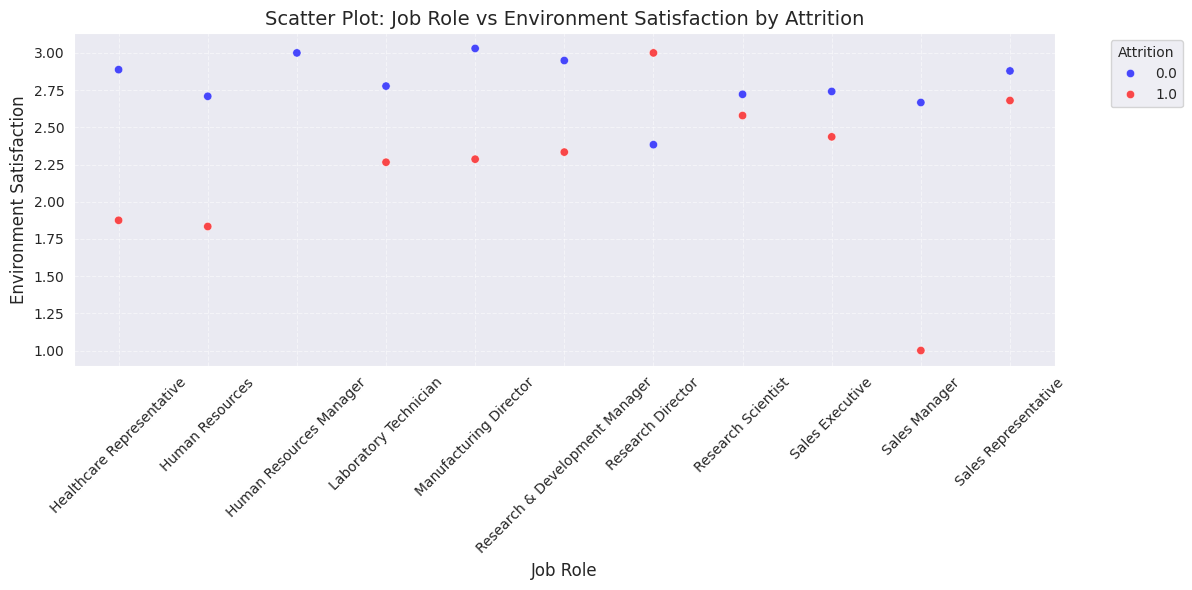

In [52]:
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=jobrole_attrition,
    x='JobRole',
    y='MeanEnvironmentSatisfaction',
    hue='Attrition',
    alpha=0.7,
    palette={1: 'red', 0: 'blue'}
)
plt.title('Scatter Plot: Job Role vs Environment Satisfaction by Attrition', fontsize=14)
plt.xlabel('Job Role', fontsize=12)
plt.ylabel('Environment Satisfaction', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)

plt.legend(title='Attrition', loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=10)
plt.tight_layout()
plt.show()


* Kepuasan lingkungan kerja tampaknya merupakan faktor yang berkontribusi pada keputusan karyawan untuk keluar dari perusahaan. Karyawan dengan kepuasan lingkungan yang lebih rendah cenderung lebih mungkin untuk keluar.
* Pengaruh kepuasan lingkungan terhadap attrition tampaknya berlaku di sebagian besar peran pekerjaan, meskipun dengan tingkat yang berbeda-beda.
* Untuk Research Director karyawan yang mengundurkan diri memiliki tingkat kepuasan lebih tinggi dibandingkan yang tetap, hal ini menandakan karyawan memiliki alasan lain untuk mengundurkan diri walaupun sudah puas dengan lingkungan kerja
* Data ini mendukung gagasan bahwa menciptakan lingkungan kerja yang positif dan memuaskan penting untuk retensi karyawan.

### Analisis Attration Berdasarkan Jarak Tempat Kerja

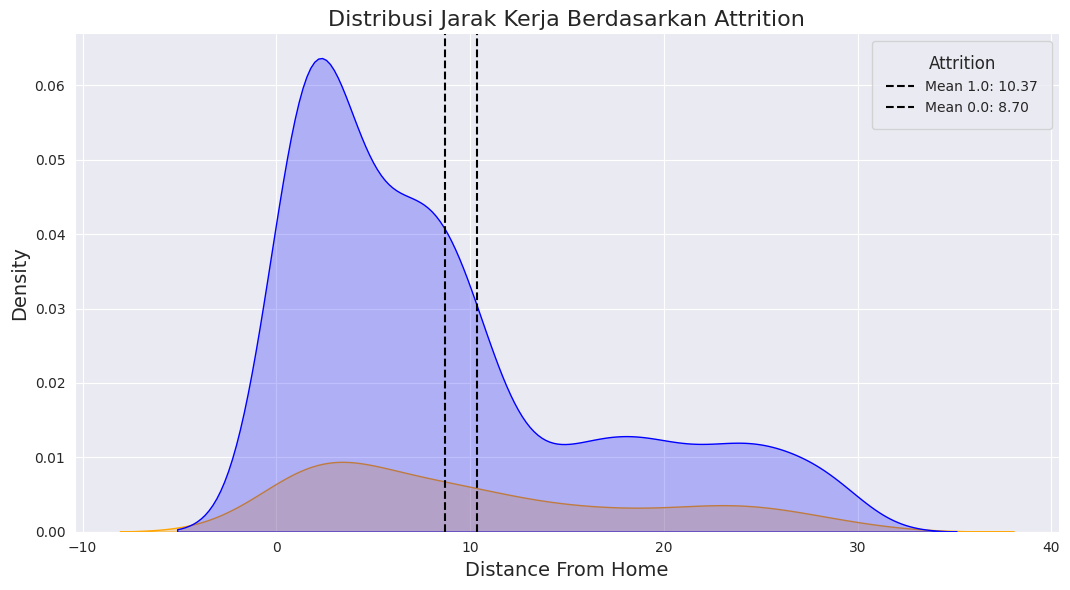

In [53]:
sns.displot(
    df, x="DistanceFromHome", hue="Attrition", kind="kde",
    height=6, aspect=1.8, fill=True, palette={1.0: 'orange', 0.0: 'blue'}, legend=False
)

attrations = df["Attrition"].unique()
for attration in attrations:
    mean_attration = df[df["Attrition"] == attration]["DistanceFromHome"].mean()
    plt.axvline(mean_attration, color="black", linestyle="--", label=f"Mean {attration}: {mean_attration:.2f}")


plt.title('Distribusi Jarak Kerja Berdasarkan Attrition', fontsize=16)
plt.xlabel('Distance From Home', fontsize=14)
plt.ylabel('Density', fontsize=14)

plt.legend(
    title='Attrition',
    loc='upper right',
    fontsize=10,
    title_fontsize=12,
    frameon=True,
    framealpha=0.8,
    borderpad=1
)

plt.tight_layout()

plt.show()


Berdasarkan bar chart ini dan pertimbangan di atas, dapat disimpulkan bahwa tidak ada cukup bukti untuk menyatakan bahwa attrition dipengaruhi secara signifikan oleh jarak dari rumah, baik untuk karyawan yang tinggal di bawah rata-rata median maupun di atas rata-rata median. Perbedaan rata-rata jarak antara karyawan yang keluar dan yang tetap relatif kecil

### Analisis Hubungan Antar Variabel

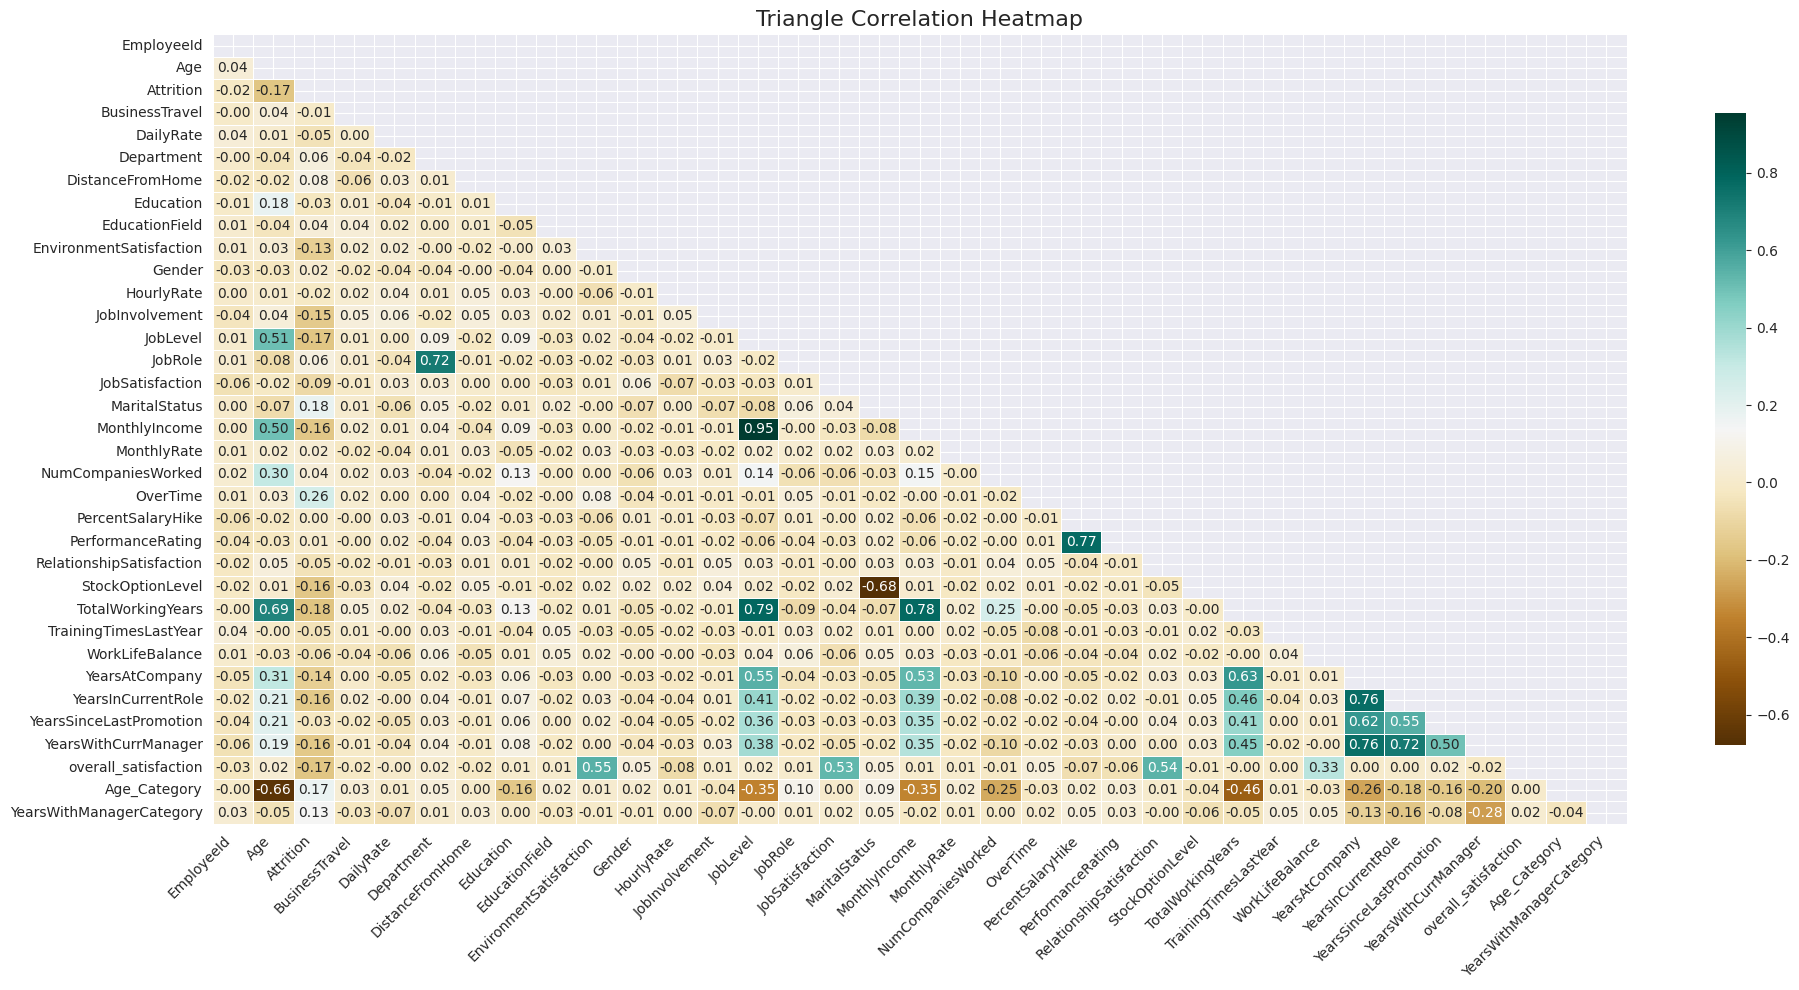

In [54]:
correlation_matrix = df.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap="BrBG", fmt=".2f", linewidths=.5,
            cbar_kws={"shrink": .8})

plt.title("Triangle Correlation Heatmap", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

* Heatmap ini mengungkapkan beberapa hubungan yang logis dan diharapkan antar variabel.
* Korelasi Kuat:
  * Age dengan MonthlyIncome, dan job level: memiliki korelasi 0.5 menandakan semakin lama bekerja job level dan monthly income akan naik juga
  * Job level dengan Monthly Income: memiliki korelasi 0.95 menandakan job level semakin tinggi maka income akan naik juga
  * Percent Salary Hike dengan Performance Rating: memiliki korelasi 0.77 menandakan performa yang semakin baik memberikan salary yang semakin tinggi
* Tidak ada korelasi yang sangat mengejutkan atau tidak terduga.
* Sebagian besar variabel tidak berkorelasi kuat satu sama lain, menunjukkan bahwa mereka mengukur aspek yang berbeda dari data.

<ipython-input-55-e280d1ea2cdb>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=corr_with_target.index, x=corr_with_target.values, palette='coolwarm')


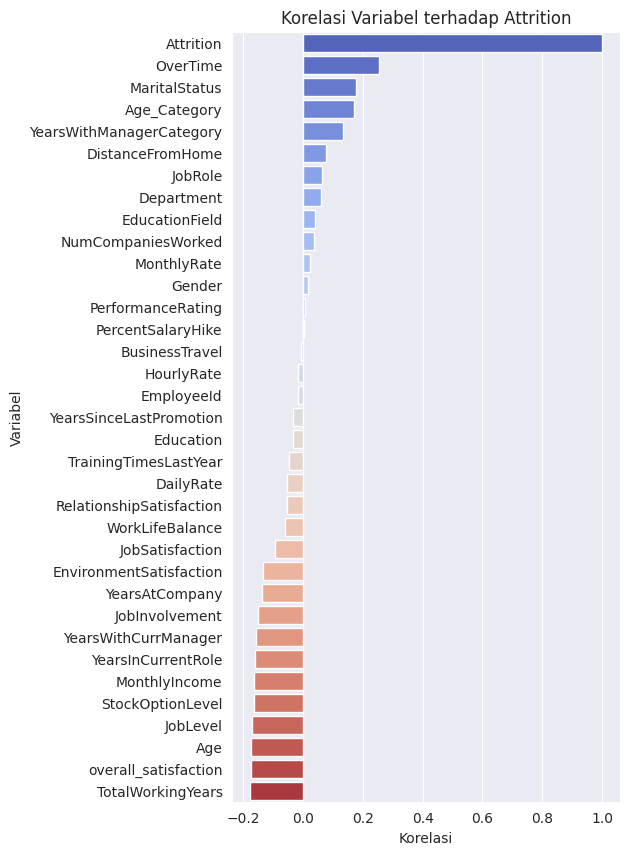

In [55]:
corr_with_target = df.corr()['Attrition'].sort_values(ascending=False)

plt.figure(figsize=(5, 10))
sns.barplot(y=corr_with_target.index, x=corr_with_target.values, palette='coolwarm')
plt.title("Korelasi Variabel terhadap Attrition")
plt.xlabel("Korelasi")
plt.ylabel("Variabel")
plt.show()

* Faktor-faktor yang berkaitan dengan pengalaman kerja dan senioritas (seperti TotalWorkingYears, Age, JobLevel, YearsAtCompany, YearsInCurrentRole, YearsWithCurrManager) berkorelasi negatif dengan Attrition. Ini menunjukkan bahwa karyawan yang lebih senior dan mapan cenderung lebih kecil kemungkinannya untuk keluar.
* Faktor-faktor yang berkaitan dengan kepuasan (seperti overall_satisfaction, JobSatisfaction, EnvironmentSatisfaction, WorkLifeBalance, RelationshipSatisfaction) juga berkorelasi negatif dengan Attrition. Ini menegaskan bahwa kepuasan kerja merupakan faktor penting dalam retensi karyawan.
* Lembur (OverTime) merupakan faktor yang berkorelasi positif dengan Attrition, yang mengindikasikan bahwa lembur dapat meningkatkan kemungkinan karyawan untuk keluar.

## Modeling

In [35]:
rf = RandomForestClassifier(random_state=42)
lr = LogisticRegression(random_state=42, max_iter=100000)
svm = SVC(max_iter=-1, kernel='rbf', random_state=42)

code diatas menyiapkan metode klasifikasi yang digunakan, parameter random_state diatur 42 digunakan untuk mengendalikan keacakan yang terjadi dalam proses pelatihan model, untuk regresi logistik maximum iterasi diatur tinggi begitu juga dengan svm dengan kernel defaulth ='rbf'

In [ ]:
models = {
            'Random Forest': rf,
            'Logistic Regression': lr,
            'SVM': svm
        }

model dibungkus kedalam dictionary yang nantinya akan digunakan pada tahapan evaluasi

## Evaluation

In [36]:
def evaluate_models(X, y, models, scoring=None, cv=5):
    """
    Fungsi untuk mengevaluasi berbagai model dengan cross-validation.

    Parameters:
    X: array-like or DataFrame
        Fitur input (train data).
    y: array-like or Series
        Target output (train labels).
    models: dict, model-model yang akan dievaluasi.
    scoring: list of str, optional
        List skor metrik yang akan dihitung, seperti ['accuracy', 'precision', 'recall', 'f1', 'roc_auc'].
    cv: int, default=5
        Jumlah fold untuk cross-validation.

    Returns:
    DataFrame: Tabel hasil cross-validation untuk setiap model.
    """

    if scoring is None:
        scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

    results = []

    for model_name, model in models.items():
        cv_results = cross_validate(model, X, y, cv=cv, scoring=scoring, return_train_score=False)

        avg_accuracy = cv_results['test_accuracy'].mean()
        avg_precision = cv_results['test_precision'].mean()
        avg_recall = cv_results['test_recall'].mean()
        avg_f1 = cv_results['test_f1'].mean()
        avg_auc = cv_results['test_roc_auc'].mean()

        results.append({
            'Model': model_name,
            'Accuracy': avg_accuracy,
            'Precision': avg_precision,
            'Recall': avg_recall,
            'F1 Score': avg_f1,
            'AUC': avg_auc
        })

    results_df = pd.DataFrame(results)

    return results_df

Fungsi evaluate_models bertujuan untuk mengevaluasi kinerja beberapa model menggunakan validasi silang (cross-validation). Fungsi mengembalikan DataFrame Pandas yang berisi hasil evaluasi untuk setiap model. DataFrame ini memiliki kolom-kolom berikut:

* Model: Nama model.
* Accuracy: Rata-rata akurasi.
* Precision: Rata-rata presisi.
* Recall: Rata-rata recall.
* F1 Score: Rata-rata F1 score.
* AUC: Rata-rata AUC (Area Under the ROC Curve).

**Normal Data**

In [44]:
normal_result = evaluate_models(X_train_scaled, y_train, models=models)
normal_result

,Model,Accuracy,Precision,Recall,F1 Score,AUC
0,Random Forest,0.839189,0.665714,0.113000,0.189259,0.777252
1,Logistic Regression,0.840541,0.552416,0.331000,0.412284,0.826348
2,SVM,0.841892,0.766667,0.089333,0.154961,0.793015


* Dari segi akurasi, ketiga model memiliki kinerja yang mirip, dengan SVM sedikit lebih unggul.
* Namun, jika kita melihat metrik lain, Logistic Regression menunjukkan keseimbangan yang lebih baik antara presisi dan recall, dengan skor F1 dan AUC yang lebih tinggi dibandingkan Random Forest dan SVM.
* Random Forest dan SVM memiliki masalah dengan recall yang sangat rendah, yang berarti mereka kesulitan mengidentifikasi data positif yang sebenarnya. Meskipun SVM memiliki presisi yang tinggi, recall yang rendah menghasilkan skor F1 yang buruk.
* Kesimpulan hasil klasifikasi ini adalah model memberikan nilai yang baik terhadap metrik akurasi dan AUC, di mana akurasi menandakan proporsi prediksi yang benar dari total prediksi (baik positif maupun negatif) dan AUC menandakan kemampuan model untuk membedakan antara kelas positif dan negatif di berbagai threshold klasifikasi. Namun model memberikan nilai F1 Score yang rendah dikarenakan nilai recall yang rendah, hal ini menandakan model kurang baik dalam mengidentifikasi data positif yang sebenarnya (atau dalam konteks attrition, kurang baik dalam mengidentifikasi karyawan yang sebenarnya keluar dari perusahaan), meskipun model mungkin cukup baik dalam menghindari false positive (prediksi positif yang salah). Dengan kata lain, model cenderung melewatkan banyak kejadian attrition yang sebenarnya terjadi.

**Oversampling SMOTE**

In [45]:
smt_result = evaluate_models(X_smt, y_smt, models=models)
smt_result

,Model,Accuracy,Precision,Recall,F1 Score,AUC
0,Random Forest,0.934344,0.950564,0.917086,0.925506,0.982333
1,Logistic Regression,0.827142,0.801091,0.870155,0.834016,0.890066
2,SVM,0.918844,0.888641,0.957750,0.921549,0.978488


Teknik oversampling berhasil meningkatkan performa model, baik nilai akurasi f1 score dan nilai AUC. Hasil ini sudah sangat baik untuk digunakan untuk memprediksi kejadian attrition karyawan

In [47]:
best_model = models['Random Forest']
best_model.fit(X_train_scaled, y_train)

joblib.dump(best_model, 'output/model.pkl')

['output/model.pkl']

In [63]:
# !pip install pipreqs

In [65]:
!pipreqs .

INFO: Not scanning for jupyter notebooks.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
INFO: Successfully saved requirements file in ./requirements.txt
